# Expected Epidemic Size of Mask Model -- Multitypes

$P(A_{L, 0}) = f_0(P(A_{L - 1, 0}), P(A_{L - 1, 1}))$

$P(A_{L, 1}) = f_1(P(A_{L - 1, 0}), P(A_{L - 1, 1}))$

$M$ types of masks in total

$P(\text{not wear a mask(type-1)}) = m_1$

$P(\text{wear a type-1 mask}) = m_1$

$P(\text{wear a type-2 mask}) = m_2$

...

$P(\text{wear a type-M mask}) = m_{M}$

$\sum_{i=1}^{M} m_i = 1$


$A_{L, 1}$ := Node v becomes **active** at level L given he **doesn't wear** a mask

$A_{L, 2}$ := Node v becomes **active** at level L given he **wears** a type-1 mask

$A_{L, 3}$ := Node v becomes **active** at level L given he **wears** a type-2 mask

...

$A_{L, M}$ := Node v becomes **active** at level L given he **wears** a type-M mask




## 1. Condition on num of neighbors from lower level

**Assumption**: Same degree distribution for all types of nodes







$B_k$ := Node v has $k - 1$ lower level neighbors

$P(A_{L, i}) = \sum_{k = 0}^{\infty}{P(A_{L, i} | B_k) * P(B_k)}$

where

$i = 0,1$

$P(B_k) = \frac{k p_{k}}{\langle k\rangle}$


## 2. Condition on num of neighbors wearing different types of masks

$N_i$ := Num of neighbors wearing type-i masks, $i \in \{1, 2, ..., M\}$
 
$\textbf{N} = (N_1, N_2, ..., N_{M}) \sim \operatorname{Multinomial}\left(k - 1, \textbf{p}\right)$
 
where
$\textbf{p} = (m_1, m_2, ..., m_{M})$


$P(A_{L, i} | B_k) = \sum_{n_1 = 0}^{k - 1} \sum_{n_2 = 0}^{k - 1 - n_1} ... \sum_{n_{M} = 0}^{k - 1 - (n_1 + ... + n_{M-1})}
P(A_{L, i} | B_k, \textbf{N} = (n_1, ..., n_{M})) * \frac{(k - 1)!}{n_1!n_2!...n_{M}!} * {m_1}^{n_1} * {m_2}^{n_2}  * ... * {m_{M}}^{n_{M}} $

where

$\sum_{i = 1}^{M}n_i = 1$

## 3. Condition on num of active lower level neighbors

$I_i$ := $I_i$ of $k-1$ lower level neighbors active and wear type-i masks

$\textbf{I} = (I_1, I_2, ..., I_{M})$


$I_i \sim \operatorname{Binomial}\left(n_i, P(A_{L-1,i})\right)$, where $i \in \{1, 2, ..., M\}$


$ P(A_{L, i} | B_k, \textbf{N} = (n_1, n_2, ..., n_{M})) = \\ \sum_{k_1 = 0}^{n_1}\sum_{k_2=0}^{n_2} ...\sum_{k_{M}=0}^{n_{M}} P(A_{L, i} | B_k, \textbf{N} =  (n_1, n_2, ..., n_{M}), \textbf{I} = (k_1, k_2, ..., k_{M})) \\* \left(\begin{array}{c}
n_1 \\
k_1
\end{array}\right) \left(\begin{array}{c}
n_2 \\
k_2
\end{array}\right) ... \left(\begin{array}{c}
n_{M} \\
k_{M}
\end{array}\right) * \\ (P(A_{L-1, 1})^{k_1} * (1 - P(A_{L-1,2}))^{n_1 - k_1}) \\ * (P(A_{L-1, 2})^{k_2} * (1 - P(A_{L-1, 2}))^{n_2 - k_2}) \\ * ... \\* (P(A_{L-1, M})^{k_{M}} * (1 - P(A_{L-1, M}))^{n_{M} - k_{M}})$

## 4. $P(A_{L, i} | B_k, \textbf{N} =  (n_1, ..., n_{M}), \textbf{I} = (k_1, ..., k_{M})) $

$R$ := $ B_k, \textbf{N} =  (n_1, ..., n_{M}), \textbf{I} = (k_1, ..., k_{M})$

![Screen%20Shot%202020-10-25%20at%203.02.15%20PM.png](attachment:Screen%20Shot%202020-10-25%20at%203.02.15%20PM.png)


$P(A_{L,i} | R)$

$ = P(\text{At least 1 of node v's active neighbors succssfully infects it, given node v wears a mask} | R)$

$ = 1 - \Pi_{j = 1}^M(1 - Tji)^{k_j}$

T_mask1 : outward effeciency of masks

T_mask2 : inward effeciency of masks

In [36]:
from os import listdir
from os.path import isfile, join
import json
from operator import mul    # or mul=lambda x,y:x*y
from fractions import Fraction
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson
from scipy.special import comb
from scipy import optimize 
import multiprocessing, time
from multiprocessing import Manager
from collections import defaultdict
import collections
import sys, os
sys.path.append(os.path.abspath("auxiliary_scripts/"))
from jupyter_aux import *

In [37]:
def get_processed_res(thr=0.05, n=5000, e=1000, 
                         m=0.45, T=0.6, 
                         tm1=0.3, tm2=0.7, 
                         checkpoint=100, 
                         msg='0to3', time_exp='', modelname='',):
    
    res = load_sim_raw_results(n=n, e=e, 
                         m=m, T=T, 
                         tm1=tm1, tm2=tm2, 
                         checkpoint=checkpoint, 
                         msg=msg,
                         modelname=modelname,
                              time_exp=time_exp)
    
    res_list = process_raw(res['raw'], res['paras'], thr)
    
    return res_list, res['paras'], res['mdl']

# Check merge file

In [56]:
isitmt_0to10.keys()

dict_keys(['ttl', 'mask', 'nomask', 'paras', 'mdl'])

m: 0.45
T: 0.6
tm1: [0.3, 1]
tm2: [0.7, 1]
msg: is_itmdt
modelname: mask
itemname: es
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
From output module
102621:15
From output module
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/es/change_m/is_itmdt/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/102621:15
m: 0.45
T: 0.6
tm1: [0.3, 1]
tm2: [0.7, 1]
msg: test
modelname: mask
itemname: es
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
From output module
101101:03
From output module
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/es/change_m/test/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/101101:03
m: 0.45
T: 0.6
tm1: [0.3, 1]
tm2: [0.7, 1]
msg: 0to11
modelname: mask
itemname: es
change: 0
n: 50000
e: 1000
cp: 100
time_exp:  
From output module
102618:49
cp: 1
From output module
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/n50000_ttle1000/102618:49/ss1/meandegree3.0612244897959

cp: 8
From output module
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/n50000_ttle1000/102618:49/ss1/meandegree2.2448979591836737/cp8
cp: 9
From output module
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/n50000_ttle1000/102618:49/ss1/meandegree2.2448979591836737/cp9
cp: 10
From output module
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/n50000_ttle1000/102618:49/ss1/meandegree2.2448979591836737/cp10
cp: 1
From output module
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/n50000_ttle1000/102618:49/ss1/meandegree6.938775510204081/cp1
cp: 2
From output module
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60tm1,1_0.30

cp: 1
From output module
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/n50000_ttle1000/102618:49/ss2/meandegree6.530612244897959/cp1
cp: 2
From output module
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/n50000_ttle1000/102618:49/ss2/meandegree6.530612244897959/cp2
cp: 3
From output module
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/n50000_ttle1000/102618:49/ss2/meandegree6.530612244897959/cp3
cp: 4
From output module
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/n50000_ttle1000/102618:49/ss2/meandegree6.530612244897959/cp4
cp: 5
From output module
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60tm1,1_0.30_tm1,

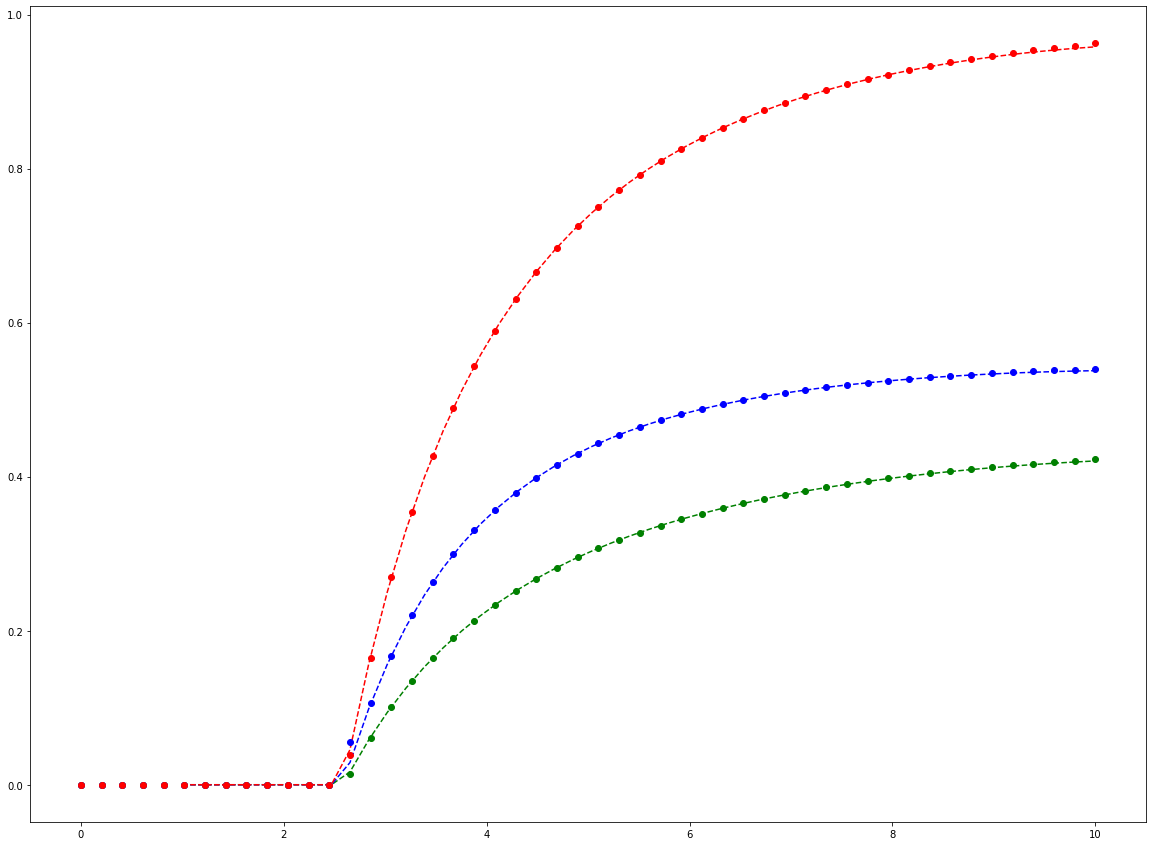

In [63]:
isitmt_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=[0.3,1], 
                                tm2=[0.7,1], 
                                itemname='es', 
                                msg='is_itmdt',)

# ani_list_0to10, aniparas_0to10, animdl_0to10 = get_processed_res(thr=0.06, n=5000, e=1000, 
#                          m=0.45, T=0.6, 
#                          tm1=[0.3,1], tm2=[0.7,1], 
#                          checkpoint=100, 
#                          msg='anitest', modelname='ani-mask')


es_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=[0.3,1], 
                                tm2=[0.7,1], 
                                itemname='es', 
                                msg='test',)

mask_list_0to10, paras_0to10, mdl_0to10 = get_processed_res(thr=0.06, n=50000, e=1000, 
                         m=0.45, T=0.6, 
                         tm1=[0.3,1], tm2=[0.7,1], 
                         checkpoint=100, 
                         msg='0to11', modelname='mask')

fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
# plot_anaylsis(isitmt_0to10, ax, legend_list, '.-')
# plot_anaylsis(es_0to10, ax, legend_list, 'x-')
ax.plot(isitmt_0to10['mdl'], np.array(isitmt_0to10['mask']) * 0.45, 'g--')
ax.plot(isitmt_0to10['mdl'], np.array(isitmt_0to10['nomask']) * (1 - 0.45), 'b--')
ax.plot(isitmt_0to10['mdl'], isitmt_0to10['ttl'], 'r--')
# plot_sim(mask_list_0to10, paras_0to10, mdl_0to10, ax, legend_list, 'P')
# plot_sim(ani_list_0to10, aniparas_0to10, animdl_0to10, ax, legend_list, 'x')
ax.plot(mdl_0to10, np.array(mask_list_0to10[0]['es0']), 'go')
ax.plot(mdl_0to10, np.array(mask_list_0to10[1]['es1']), 'bo')
ax.plot(mdl_0to10, mask_list_0to10[0]['es'], 'ro')

# Check if using mdl will make a difference

single point is correct, usnig -mdl 10 or -mind 10 -maxd 10 -ns 1 both match 0to9

## mdl 0 to 9-- match 0 to 9

In [9]:
# kmax = 20
change_mdl_0to9 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=[0.3,1], 
                                tm2=[0.7,1], 
                                itemname='pe', 
                                msg='changemdl0to9',)
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
# plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(change_mdl_0to9, ax, legend_list, '+-')

m: 0.45
T: 0.6
tm1: [0.3, 1]
tm2: [0.7, 1]
msg: changemdl0to9
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
From output module


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changemdl0to9/m0.45_T0.60tm1,1_0.30_tm1,2_0.70tm2,1_1.00_tm2,2_1.00/'

# mdl 0 to 10 -- 10 will mess up

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changemdl0to10
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102216:46
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changemdl0to10/m0.45_T0.60_tm1_0.30_tm2_0.70/102216:46
total from load_analysis_results: {'8.0': 0.829484301644654, '10.0': 0.8851626935093486, '9.0': 0.86086553482791, '7.0': 0.7873768166068074, '1.0': 1.267483951128412e-10, '5.0': 0.6379841049478319, '2.0': 1.2833737961237547e-10, '3.0': 0.20334850853737402, '6.0': 0.7279194502112503, '0.0': 0.0, '4.0': 0.4884599446522594}
total after get_ordered_values_by_key: [0.0, 1.267483951128412e-10, 1.2833737961237547e-10, 0.20334850853737402, 0.4884599446522594, 0.6379841049478319, 0.7279194502112503, 0.7873768166068074, 0.829484301644654, 0.86086553482791, 0.8851626935093486]


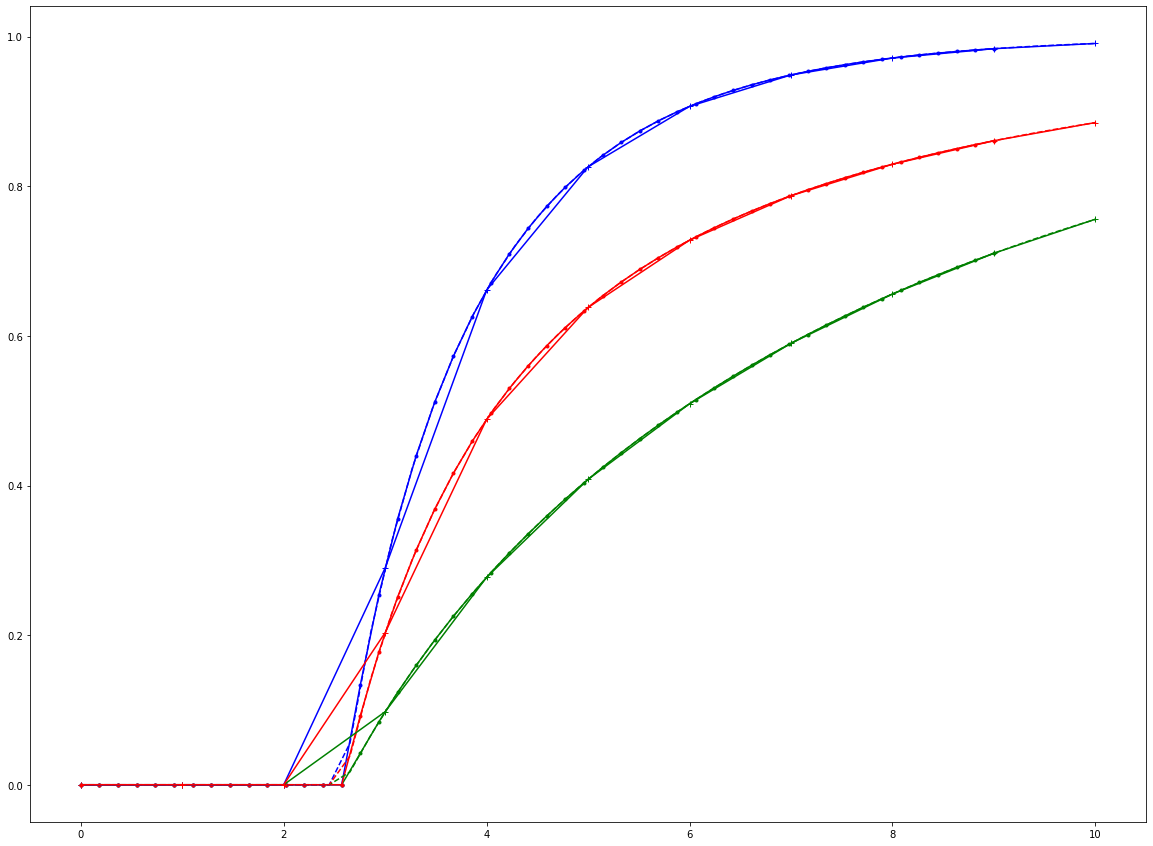

In [6]:
# kmax = 20
change_mdl_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changemdl0to10',)
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(change_mdl_0to10, ax, legend_list, '+-')

## mdl 7 to 9 -- match 0to9

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changemdl7to9
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102216:49
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changemdl7to9/m0.45_T0.60_tm1_0.30_tm2_0.70/102216:49
total from load_analysis_results: {'10.0': 0.8851626935093486, '9.0': 0.86086553482791, '8.0': 0.829484301644654}
total after get_ordered_values_by_key: [0.829484301644654, 0.86086553482791, 0.8851626935093486]


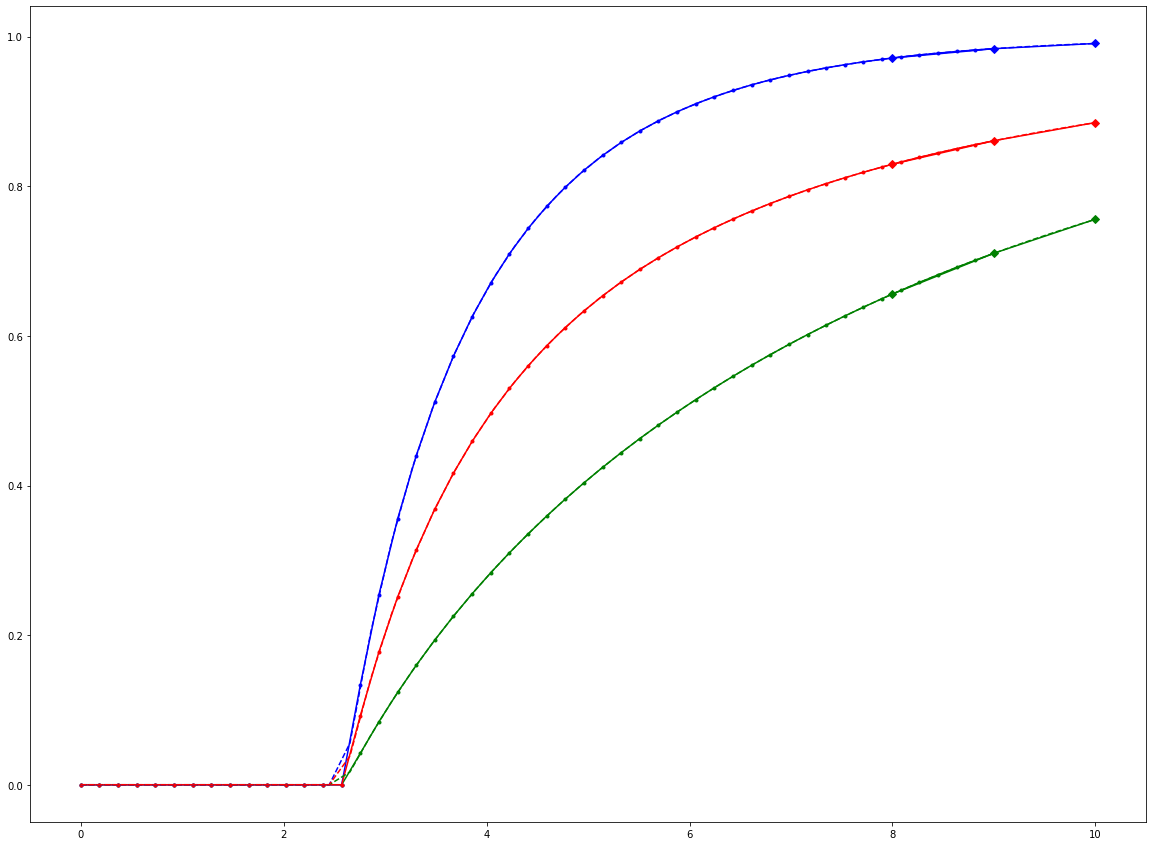

In [7]:
# kmax = 20
change_mdl_7to9 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changemdl7to9',)
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(change_mdl_7to9, ax, legend_list, 'D-')

## mdl 8, 9, 10

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changemdl_8to10
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102217:22
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changemdl_8to10/m0.45_T0.60_tm1_0.30_tm2_0.70/102217:22
total from load_analysis_results: {'10.0': 0.8851626935093486, '8.0': 0.829484301644654, '9.0': 0.86086553482791}
total after get_ordered_values_by_key: [0.829484301644654, 0.86086553482791, 0.8851626935093486]


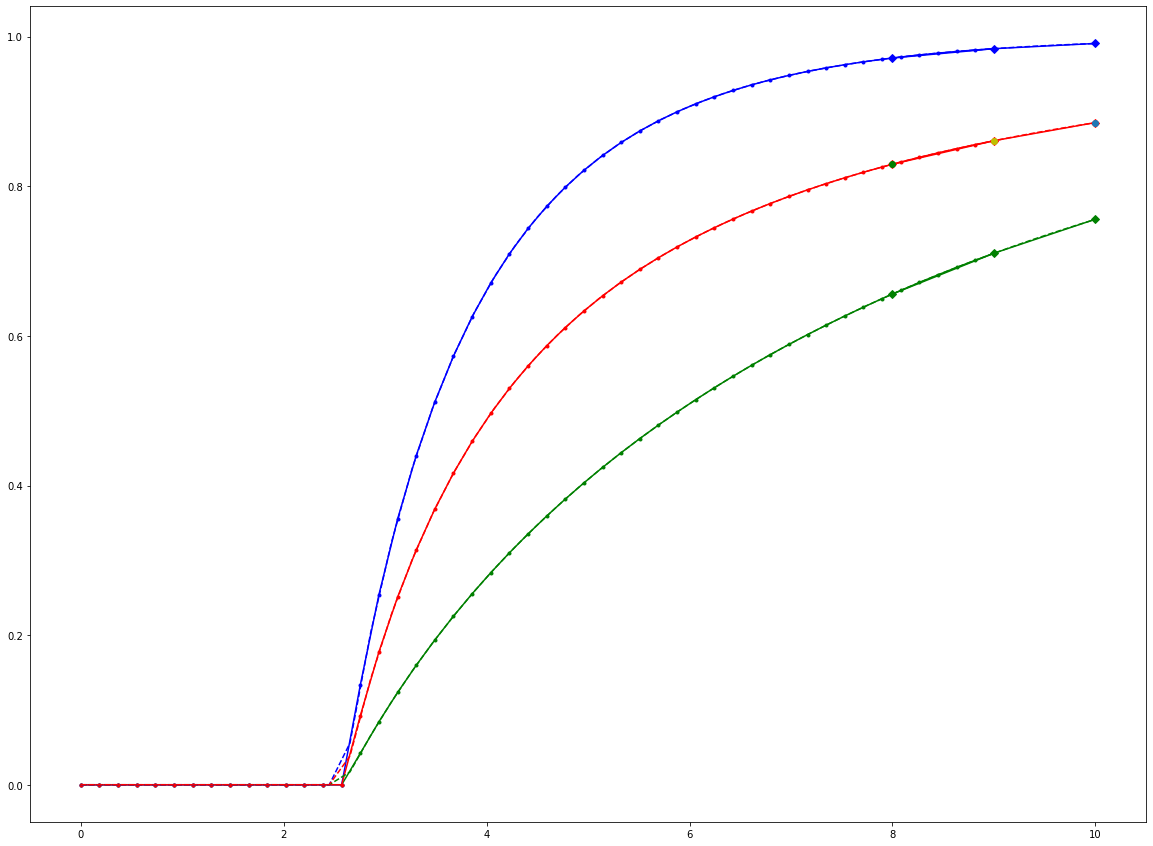

In [8]:
# kmax = 20
change_mdl_8to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changemdl_8to10',)
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(change_mdl_8to10, ax, legend_list, 'D-')
ax.plot(10, 0.8851626935093486, 'o')
ax.plot(9, 0.86086553482791, 'yo')
ax.plot(8, 0.829484301644654, 'go')

## mdl 10 -- looks correct

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changemdl10
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102216:51
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changemdl10/m0.45_T0.60_tm1_0.30_tm2_0.70/102216:51
total from load_analysis_results: {'10.0': 0.8851626935093486}
total after get_ordered_values_by_key: [0.8851626935093486]


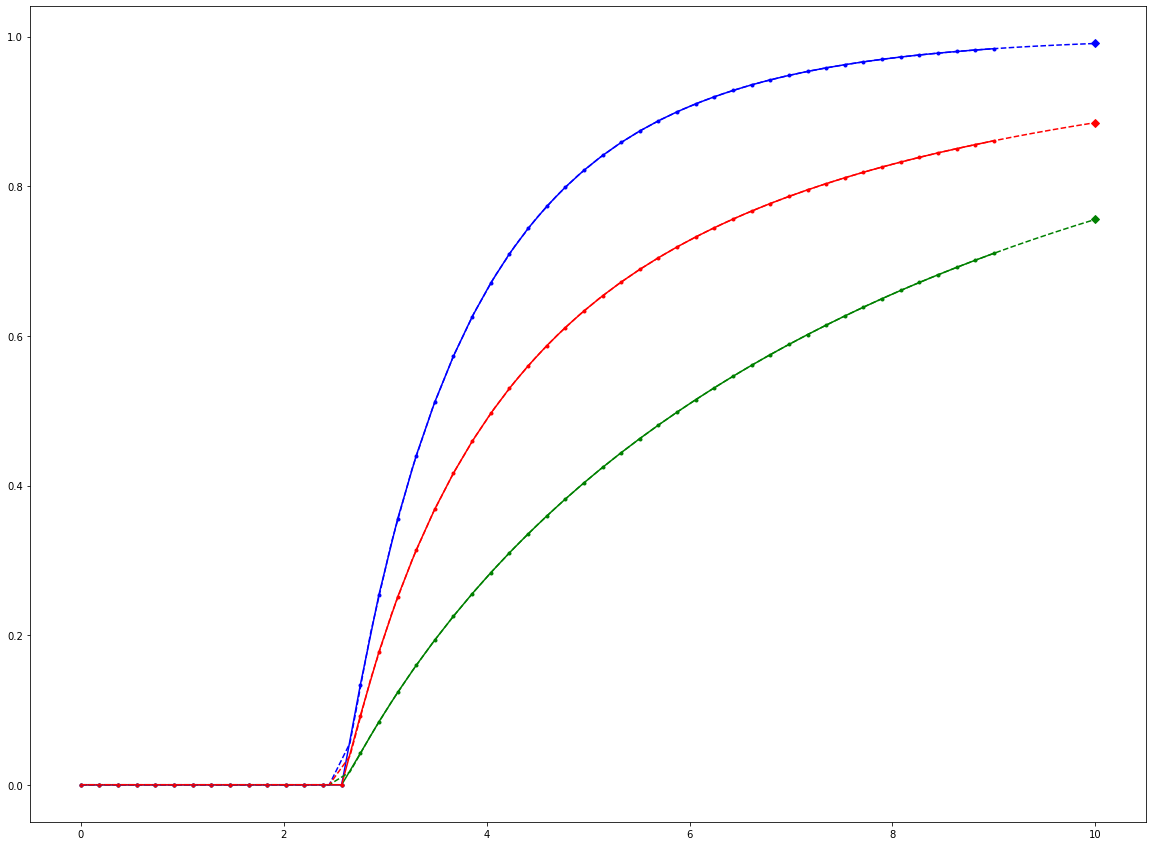

In [9]:
# kmax = 20
change_mdl_10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changemdl10',)
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(change_mdl_10, ax, legend_list, 'D-')

## linspace 10 -- seems correct

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changed10
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102217:15
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changed10/m0.45_T0.60_tm1_0.30_tm2_0.70/102217:15
total from load_analysis_results: {'8.0': 0.829484301644654, '9.0': 0.86086553482791, '10.0': 0.8851626935093486}
total after get_ordered_values_by_key: [0.829484301644654, 0.86086553482791, 0.8851626935093486]


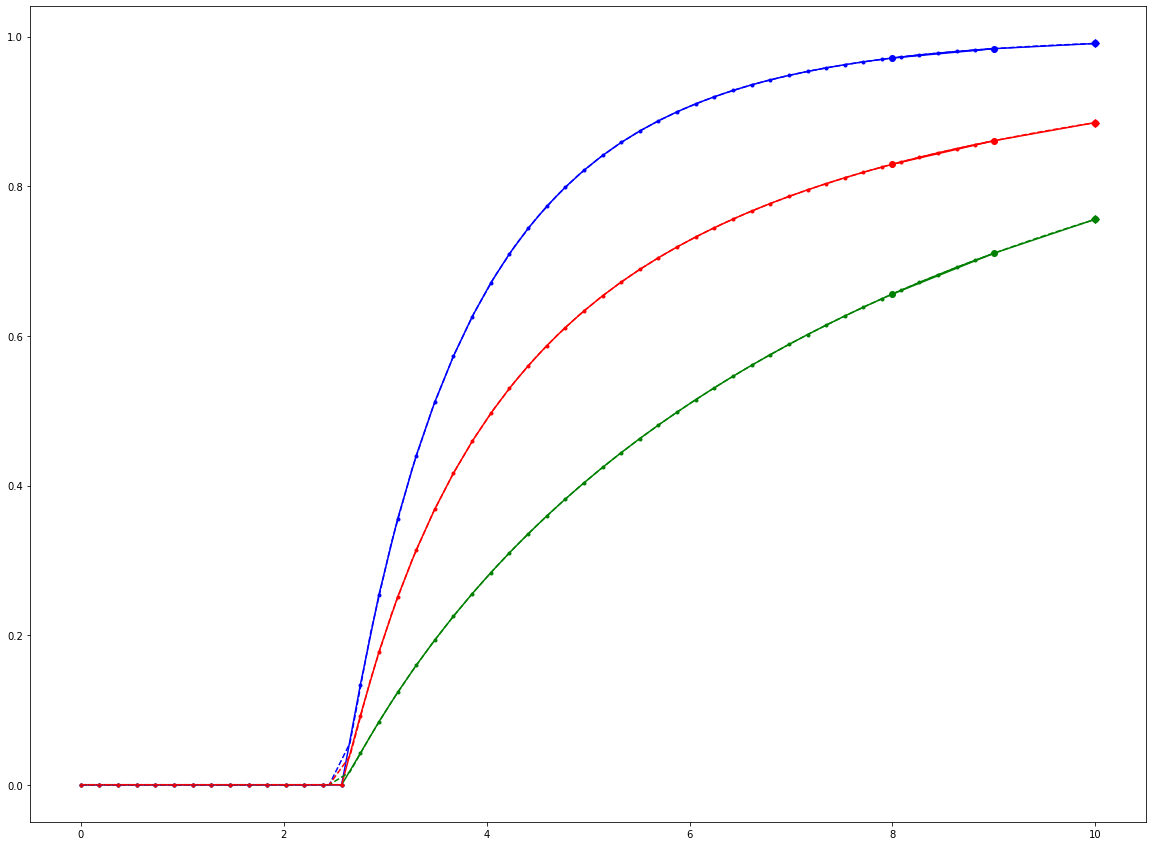

In [10]:
# kmax = 20
change_10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changed10',)
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(change_10, ax, legend_list, 'o-')
plot_anaylsis(change_mdl_10, ax, legend_list, 'D-')

# Check if things wrong because of maxd or ns 

## --increase ns will help make 0to10 better; decrease ns will make 0to10 worse; no impact on 0to9

In [11]:
# kmax = 20
change_ns_0to9 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changensfor0to9',)
pe_0to9 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='0to9')

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changensfor0to9
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102120:56
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changensfor0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/102120:56
total from load_analysis_results: {'0.3050847457627119': 6.636580174301798e-13, '0.4576271186440678': 2.976368040918942e-11, '0.15254237288135594': 1.1657341758564144e-15, '0.6101694915254238': 2.1070367672848537e-13, '0.9152542372881356': 4.0366543441194835e-11, '1.0677966101694916': 2.9653532407358796e-10, '0.7627118644067797': 3.824168759436475e-12, '1.3728813559322035': 1.8166368409566758e-11, '1.2203389830508475': 2.539590759909061e-12, '1.5254237288135595': 9.172947956770373e-11, '1.6779661016949154': 1.3839096535406272e-12, '1.8305084745762712': 5.180084139411179e-12, '1.9830508474576272': 8.063217316056637e-11, '2.135593220338983': 2.2935053856087962e-11, '2.745762711864407': 0.08756278091918053, '2.288135593220339': 5.04

In [12]:
change_ns_0to9['mdl'].shape

(60,)

In [13]:
pe_0to9['mdl'].shape

(50,)

## change ns doesn't change anything for 0 to 9

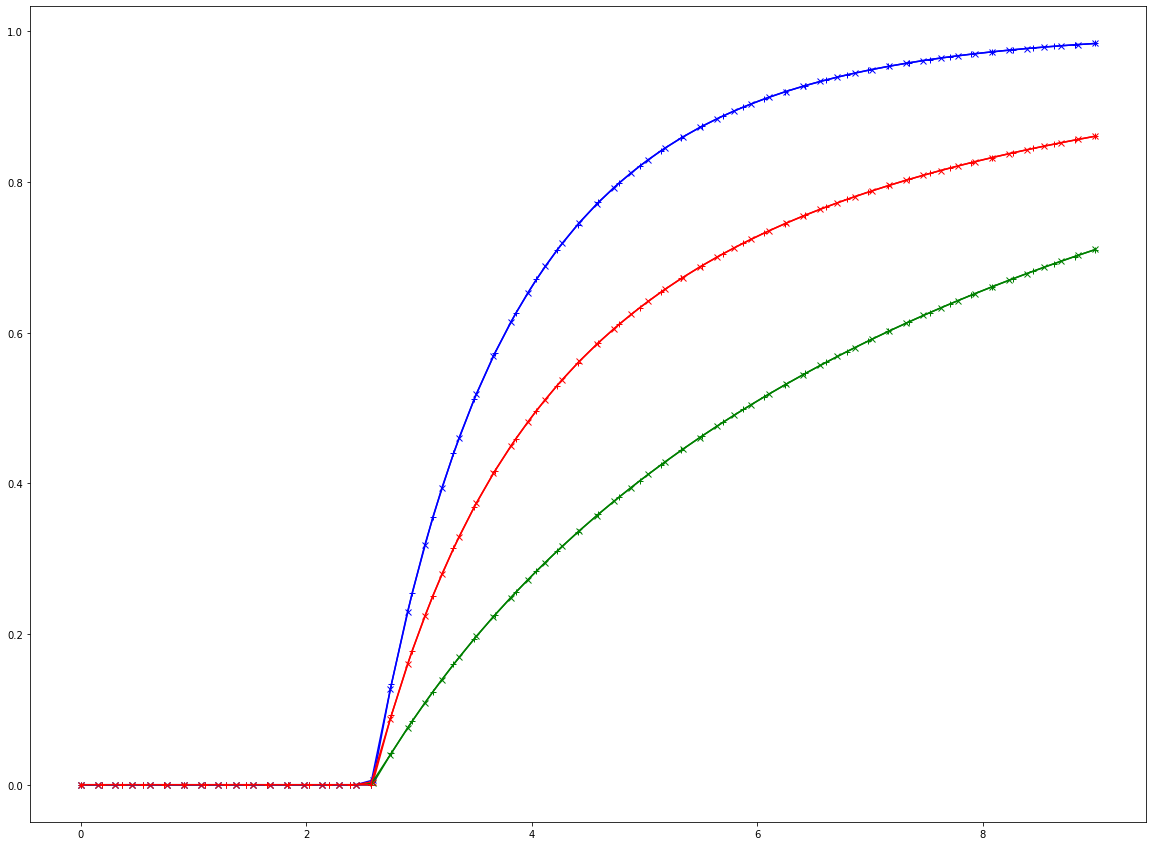

In [14]:
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
plot_anaylsis(change_ns_0to9, ax, legend_list, 'x-')
# plot_anaylsis(es_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '+-')

In [15]:
# kmax = 20
change_ns_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changensfor0to10',)
pe_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='test',)

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changensfor0to10
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102121:06
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changensfor0to10/m0.45_T0.60_tm1_0.30_tm2_0.70/102121:06
total from load_analysis_results: {'0.06289308176100629': 1.4976908602193362e-14, '0.31446540880503143': 8.839595722065496e-13, '0.25157232704402516': 1.0992873278325988e-13, '0.12578616352201258': 1.2212453270876723e-16, '0.5031446540880503': 7.370668519968149e-11, '0.44025157232704404': 2.066888327156846e-11, '0.18867924528301888': 7.788214517745474e-15, '0.37735849056603776': 4.824890487142852e-12, '0.9433962264150944': 5.970032801450031e-11, '0.5660377358490566': 7.902012377769553e-14, '1.069182389937107': 3.0146902196825923e-10, '0.6289308176100629': 3.125166792017353e-13, '0.6918238993710691': 1.0792700066986073e-12, '1.0062893081761006': 1.374480362859032e-10, '0.8176100628930818': 9.399109268670713e-12, '0.8805031446540

# Increase ns will move the curve backwards

ns = 60

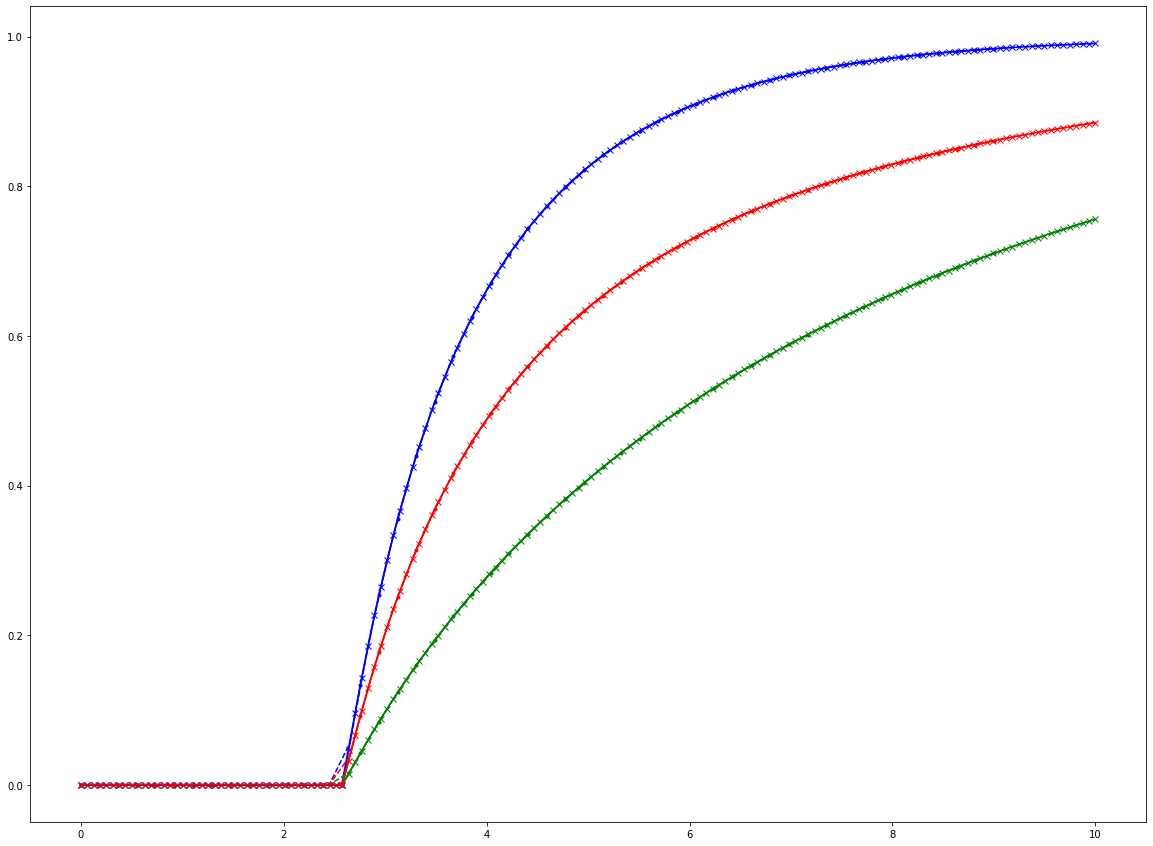

In [16]:
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
# plot_anaylsis(es_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to10, ax, legend_list, '--')


## Increase ns to 160 makes the curve move backwards a lot for 0 to 10

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changensfor0to10
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102121:06
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changensfor0to10/m0.45_T0.60_tm1_0.30_tm2_0.70/102121:06
total from load_analysis_results: {'0.06289308176100629': 1.4976908602193362e-14, '0.31446540880503143': 8.839595722065496e-13, '0.25157232704402516': 1.0992873278325988e-13, '0.12578616352201258': 1.2212453270876723e-16, '0.5031446540880503': 7.370668519968149e-11, '0.44025157232704404': 2.066888327156846e-11, '0.18867924528301888': 7.788214517745474e-15, '0.37735849056603776': 4.824890487142852e-12, '0.9433962264150944': 5.970032801450031e-11, '0.5660377358490566': 7.902012377769553e-14, '1.069182389937107': 3.0146902196825923e-10, '0.6289308176100629': 3.125166792017353e-13, '0.6918238993710691': 1.0792700066986073e-12, '1.0062893081761006': 1.374480362859032e-10, '0.8176100628930818': 9.399109268670713e-12, '0.8805031446540

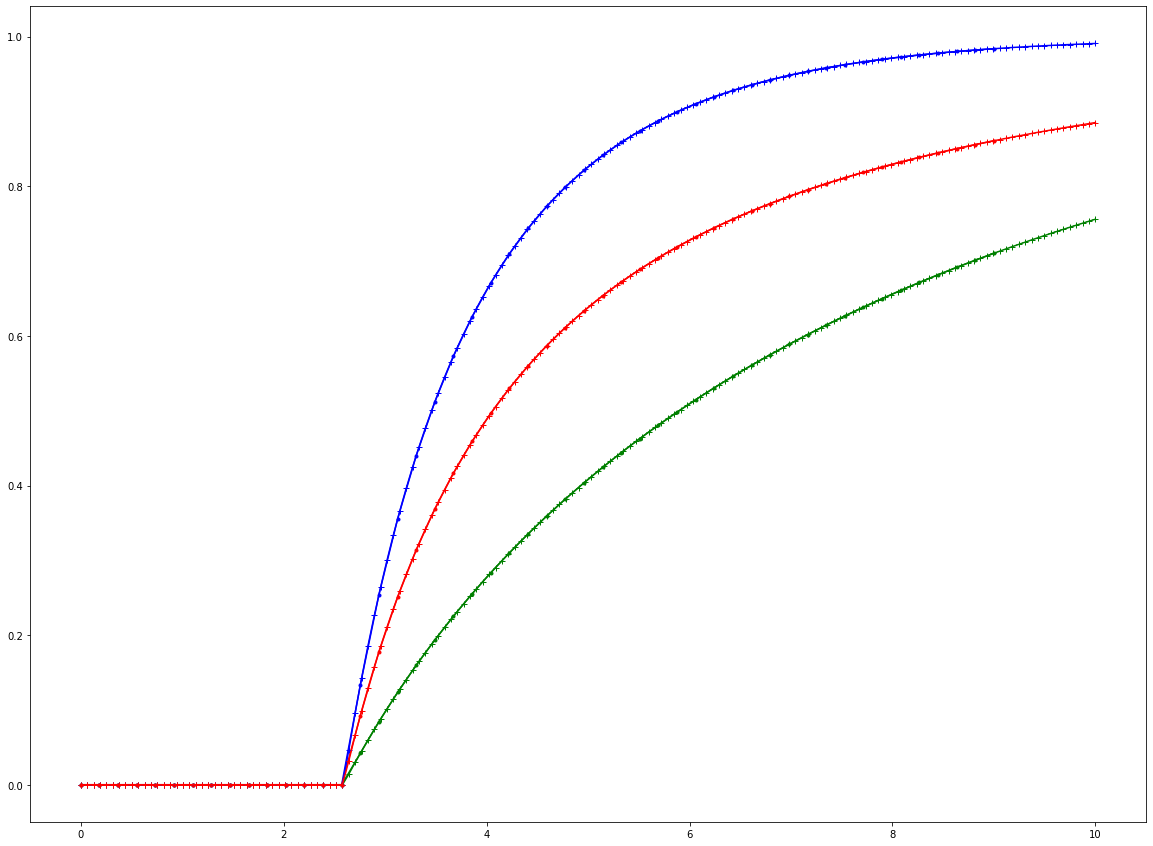

In [17]:
# kmax = 20
change_ns_0to10_ns160 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changensfor0to10',)
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
# plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(change_ns_0to10_ns160, ax, legend_list, '+-')

# Decrease ns for 0 to 10 see what happens -- ns bigger, curve better

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changensto2for0to10
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102216:18
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changensto2for0to10/m0.45_T0.60_tm1_0.30_tm2_0.70/102216:18
total from load_analysis_results: {'10.0': 0.8851626935093486, '0.0': 0.0}
total after get_ordered_values_by_key: [0.0, 0.8851626935093486]


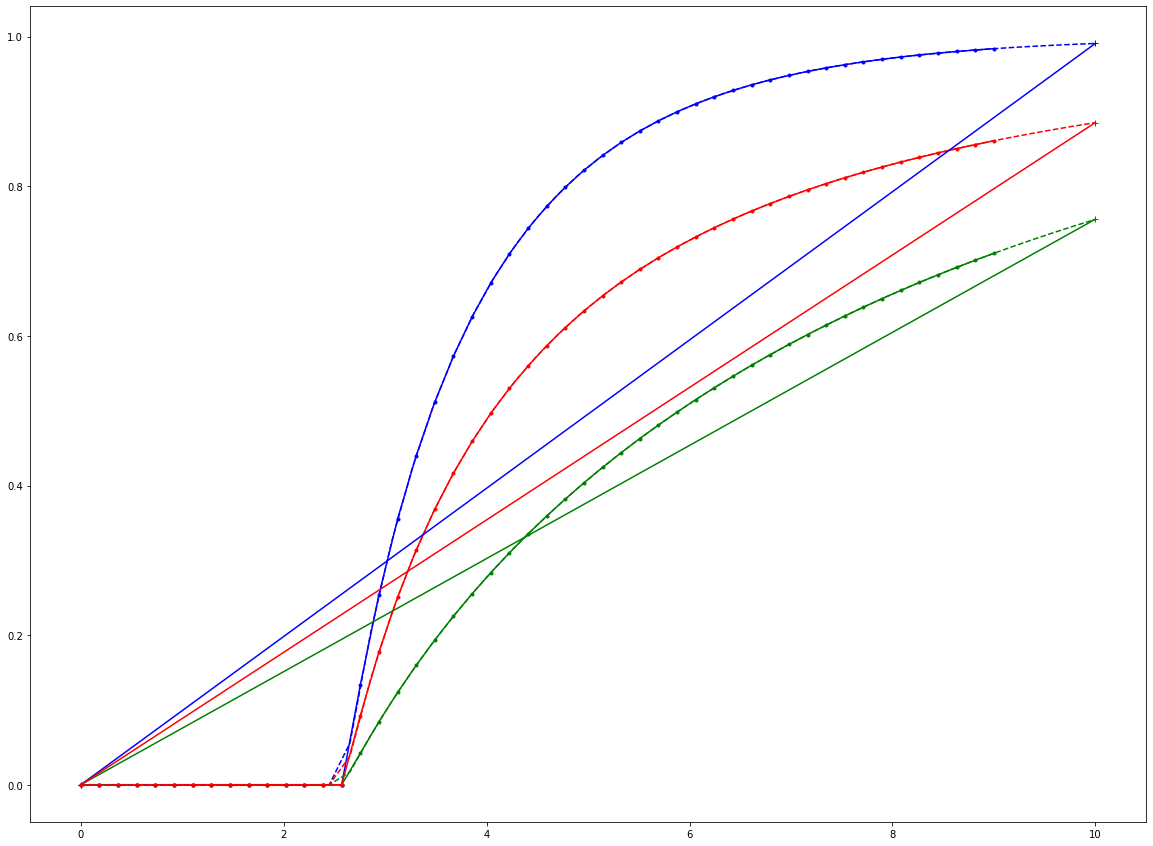

In [18]:
# kmax = 20
change_ns_0to10_ns2 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changensto2for0to10',)
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
plot_anaylsis(pe_0to10, ax, legend_list, '--')
# plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(change_ns_0to10_ns2, ax, legend_list, '+-')

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changensto4for0to10
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102216:20
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changensto4for0to10/m0.45_T0.60_tm1_0.30_tm2_0.70/102216:20
total from load_analysis_results: {'10.0': 0.8851626935093486, '6.666666666666667': 0.769947763937437, '3.3333333333333335': 0.3224331295418382, '0.0': 0.0}
total after get_ordered_values_by_key: [0.0, 0.3224331295418382, 0.769947763937437, 0.8851626935093486]


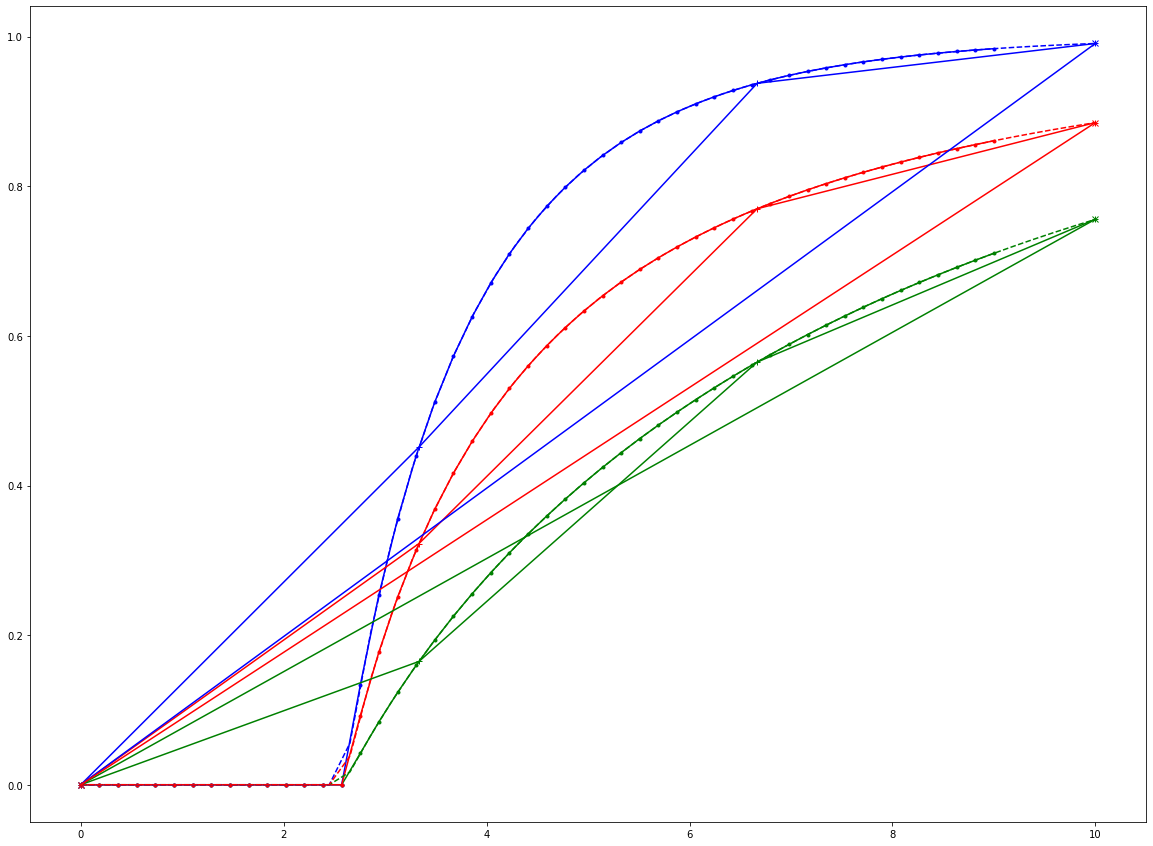

In [19]:
# kmax = 20
change_ns_0to10_ns4 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changensto4for0to10',)
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
plot_anaylsis(pe_0to10, ax, legend_list, '--')
# plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(change_ns_0to10_ns4, ax, legend_list, '+-')
plot_anaylsis(change_ns_0to10_ns2, ax, legend_list, 'x-')

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changensto6for0to10
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102216:23
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changensto6for0to10/m0.45_T0.60_tm1_0.30_tm2_0.70/102216:23
total from load_analysis_results: {'8.0': 0.829484301644654, '10.0': 0.8851626935093486, '6.0': 0.7279194502112503, '2.0': 1.2833737961237547e-10, '4.0': 0.4884599446522594, '0.0': 0.0}
total after get_ordered_values_by_key: [0.0, 1.2833737961237547e-10, 0.4884599446522594, 0.7279194502112503, 0.829484301644654, 0.8851626935093486]


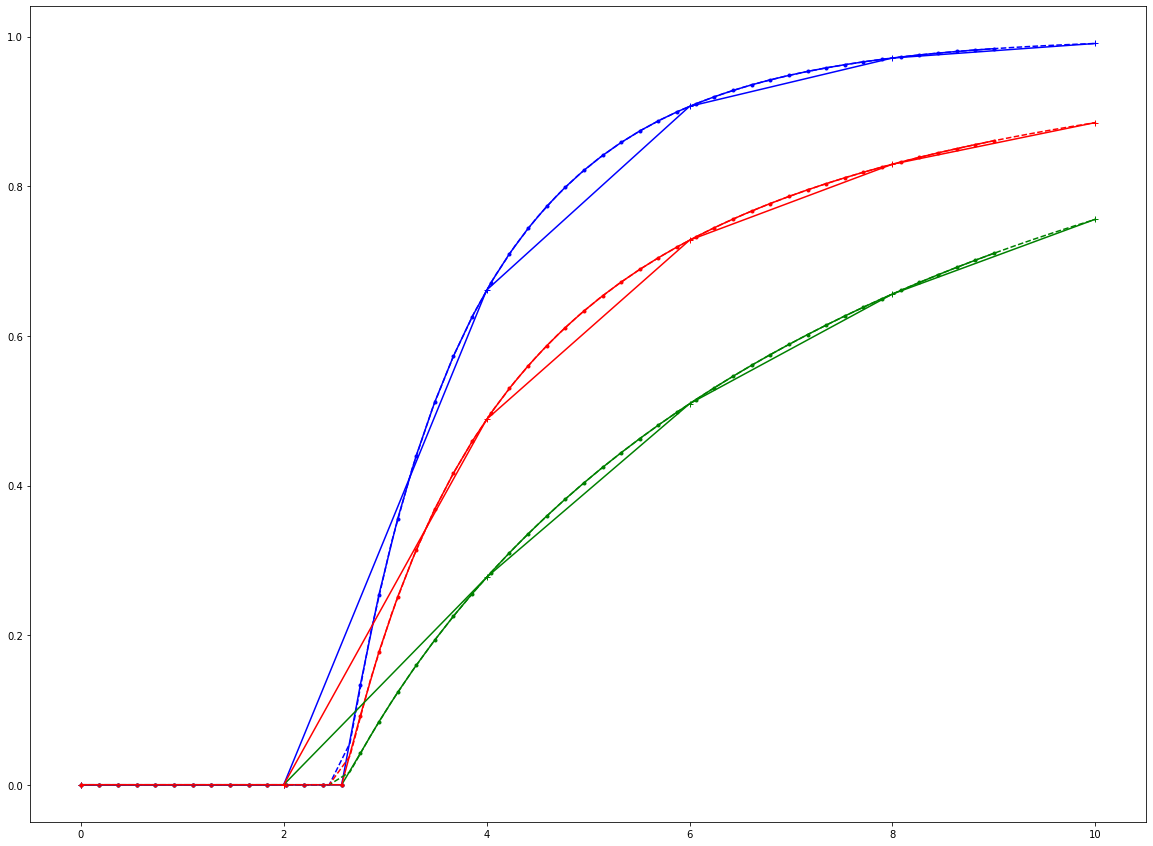

In [20]:
# kmax = 20
change_ns_0to10_ns6 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changensto6for0to10',)
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
plot_anaylsis(pe_0to10, ax, legend_list, '--')
# plot_anaylsis(pe_0to10, ax, legend_list, '--')
# plot_anaylsis(change_ns_0to10_ns4, ax, legend_list, '+-')
# plot_anaylsis(change_ns_0to10_ns2, ax, legend_list, 'x-')
plot_anaylsis(change_ns_0to10_ns6, ax, legend_list, '+-')

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changensto20for0to10
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102216:34
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changensto20for0to10/m0.45_T0.60_tm1_0.30_tm2_0.70/102216:34
total from load_analysis_results: {'0.5263157894736842': 1.1314981729348973e-10, '10.0': 0.8851626935093486, '8.421052631578947': 0.8437485721562454, '7.894736842105263': 0.8256400686552496, '8.947368421052632': 0.8594143508287921, '9.473684210526315': 0.8731014881028543, '7.368421052631579': 0.8044663579229421, '5.263157894736842': 0.6657943073365071, '1.0526315789473684': 2.462450798823568e-10, '6.842105263157895': 0.7793753267003893, '6.315789473684211': 0.7491746070030354, '1.5789473684210527': 1.523394521640853e-10, '5.789473684210526': 0.7121545187505514, '4.7368421052631575': 0.606253499311673, '3.6842105263157894': 0.4192379523425536, '4.2105263157894735': 0.5274450322966749, '3.1578947368421053': 0.263691633784

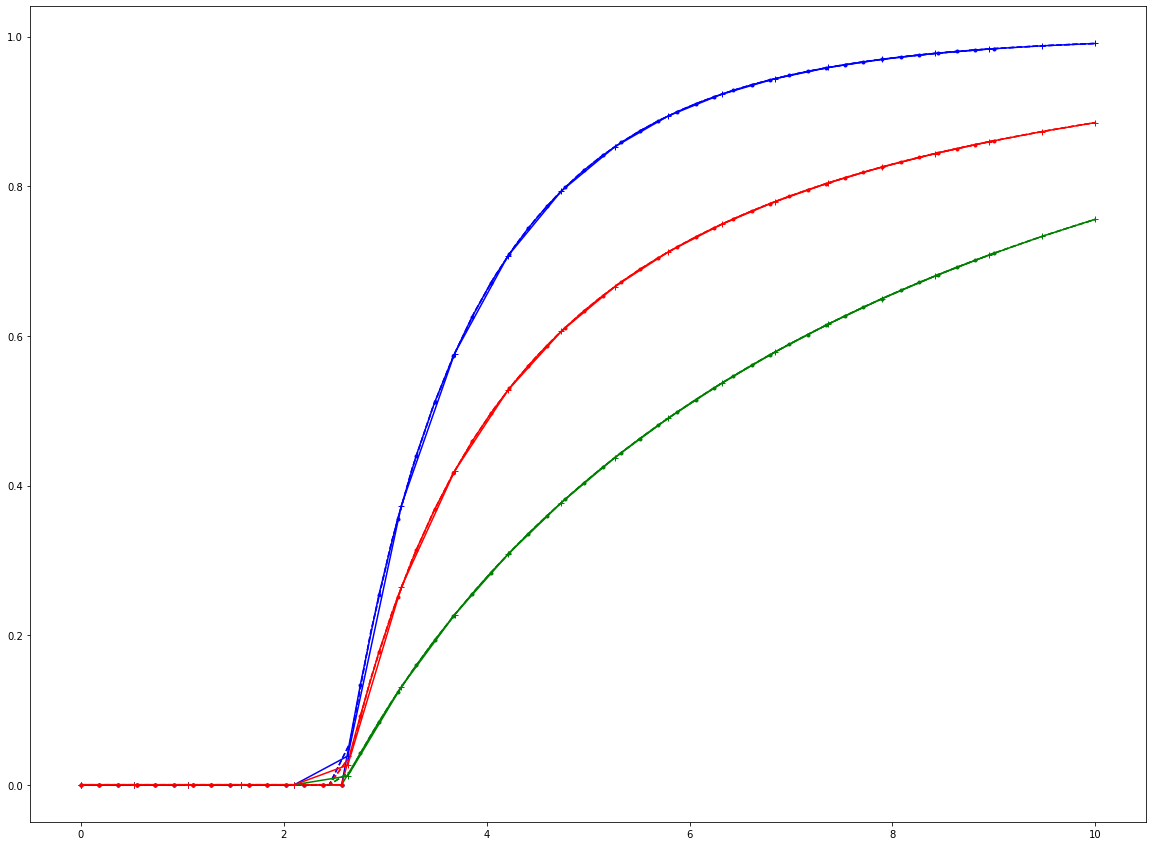

In [21]:
# kmax = 20
change_ns_0to10_ns20 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changensto20for0to10',)
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(pe_0to10, ax, legend_list, '--')
# plot_anaylsis(change_ns_0to10_ns4, ax, legend_list, '+-')
# plot_anaylsis(change_ns_0to10_ns2, ax, legend_list, 'x-')
plot_anaylsis(change_ns_0to10_ns20, ax, legend_list, '+-')

## Double check if change ns for 0 to 9 will have any impact -- nothing is changing

## increase ns to 160

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changensto160for0to9
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102216:04
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changensto160for0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/102216:04
total from load_analysis_results: {'0.05660377358490566': 6.894484982922223e-15, '0.339622641509434': 1.7972401344934497e-12, '0.5094339622641509': 8.275788943024054e-11, '0.2830188679245283': 3.2910341118963517e-13, '0.22641509433962265': 4.188871471910716e-14, '0.11320754716981132': 0.0, '0.4528301886792453': 2.6868063329743567e-11, '0.7924528301886793': 6.278755293465111e-12, '0.6226415094339622': 2.740974114345818e-13, '0.169811320754717': 3.091971123581061e-15, '0.39622641509433965': 7.61830598605684e-12, '0.7358490566037736': 2.4038271373427737e-12, '0.8490566037735849': 1.5314777224162412e-11, '0.9622641509433962': 7.708962357355631e-11, '1.0188679245283019': 1.614257394422225e-10, '0.5660377358490566': 7.9020123

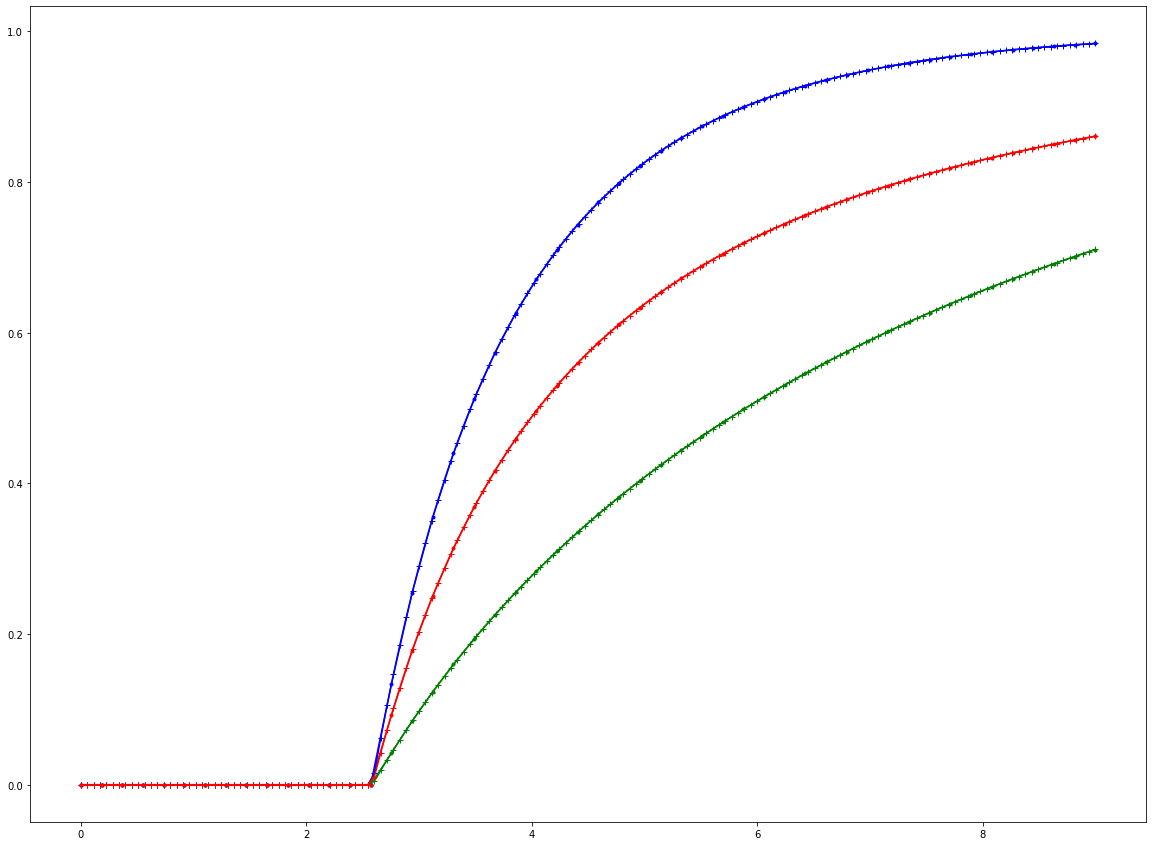

In [22]:
# kmax = 20
change_ns_0to9_ns160 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changensto160for0to9',)

fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
# plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(change_ns_0to9_ns160, ax, legend_list, '+-')

# decrease ns to 6 -- nothing changed

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: changensto6for0to9
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102216:37
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/changensto6for0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/102216:37


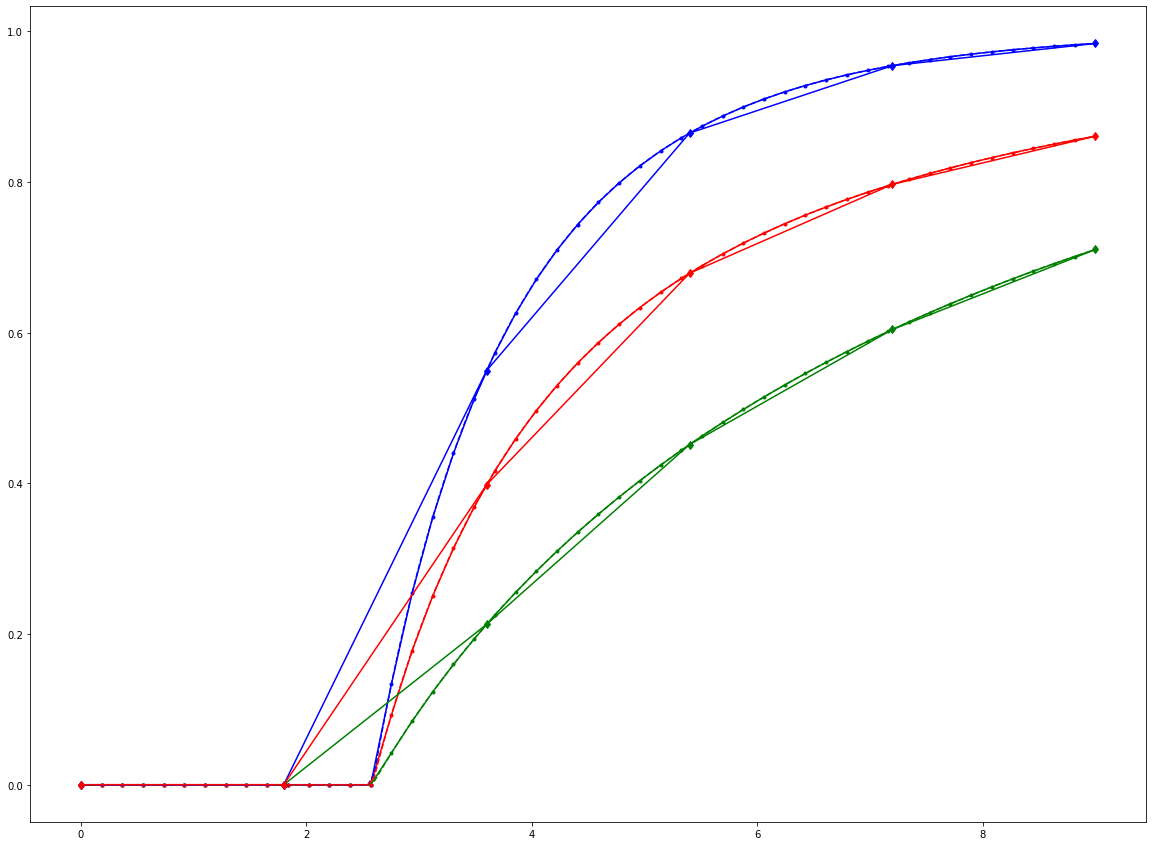

In [28]:
# kmax = 20
change_ns_0to9_ns6 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='changensto6for0to9',)

fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
# plot_anaylsis(change_ns_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')
# plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(change_ns_0to9_ns160, ax, legend_list, '--')
plot_anaylsis(change_ns_0to9_ns6, ax, legend_list, 'd-')

# Check if change the k_max works -- k_max = 20 is enough

In [11]:
# kmax = 20
change_kmax_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='change_kmax',)


m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: change_kmax
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102016:52
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/change_kmax/m0.45_T0.60_tm1_0.30_tm2_0.70/102016:52


NameError: name 'change_kmax_0to10' is not defined

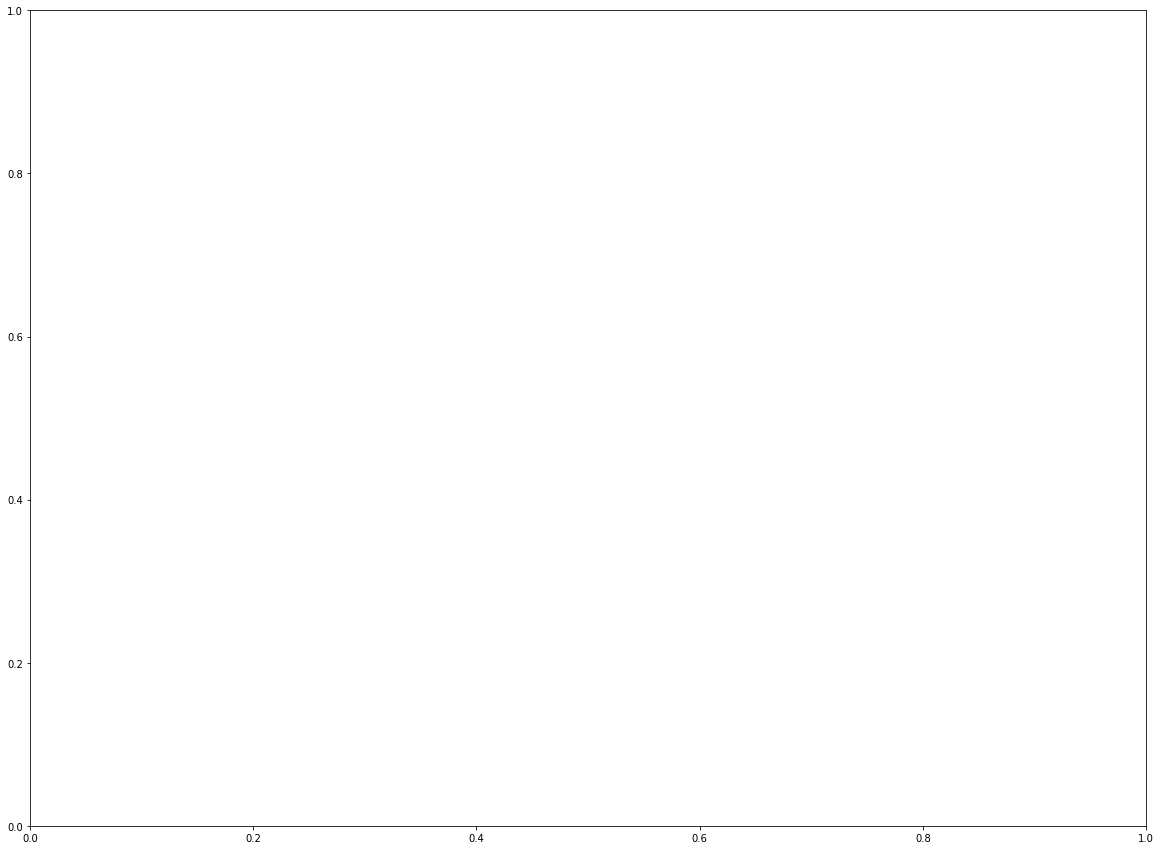

In [23]:
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
plot_anaylsis(change_kmax_0to10, ax, legend_list, 'x-')
# plot_anaylsis(es_0to10, ax, legend_list, 'x-')
plot_anaylsis(es_0to10_nosplit, ax, legend_list, '+-')

# See if splitting the code works -- no difference

In [24]:
pe_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='split_theory',)

pe_0to10_nosplit = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='test',)

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: split_theory
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102000:34
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/split_theory/m0.45_T0.60_tm1_0.30_tm2_0.70/102000:34
total from load_analysis_results: {'0.40816326530612246': 1.0095119185038472e-11, '0.20408163265306123': 1.6092682741941646e-14, '0.8163265306122449': 9.212569596073196e-12, '0.6122448979591837': 2.2007395905632166e-13, '1.0204081632653061': 1.6460547369590018e-10, '1.4285714285714286': 3.4025610107235594e-11, '1.2244897959183674': 2.6937618802236333e-12, '1.6326530612244898': 2.5217780086350674e-10, '3.8775510204081636': 0.4633039110454205, '1.836734693877551': 5.189920715409358e-12, '3.4693877551020407': 0.3629017853801663, '3.673469387755102': 0.41661745955782936, '3.2653061224489797': 0.30059642821182836, '3.0612244897959187': 0.22767428944701273, '2.0408163265306123': 1.4287737659657296e-12, '2.857142857142857': 0.1414602807984828

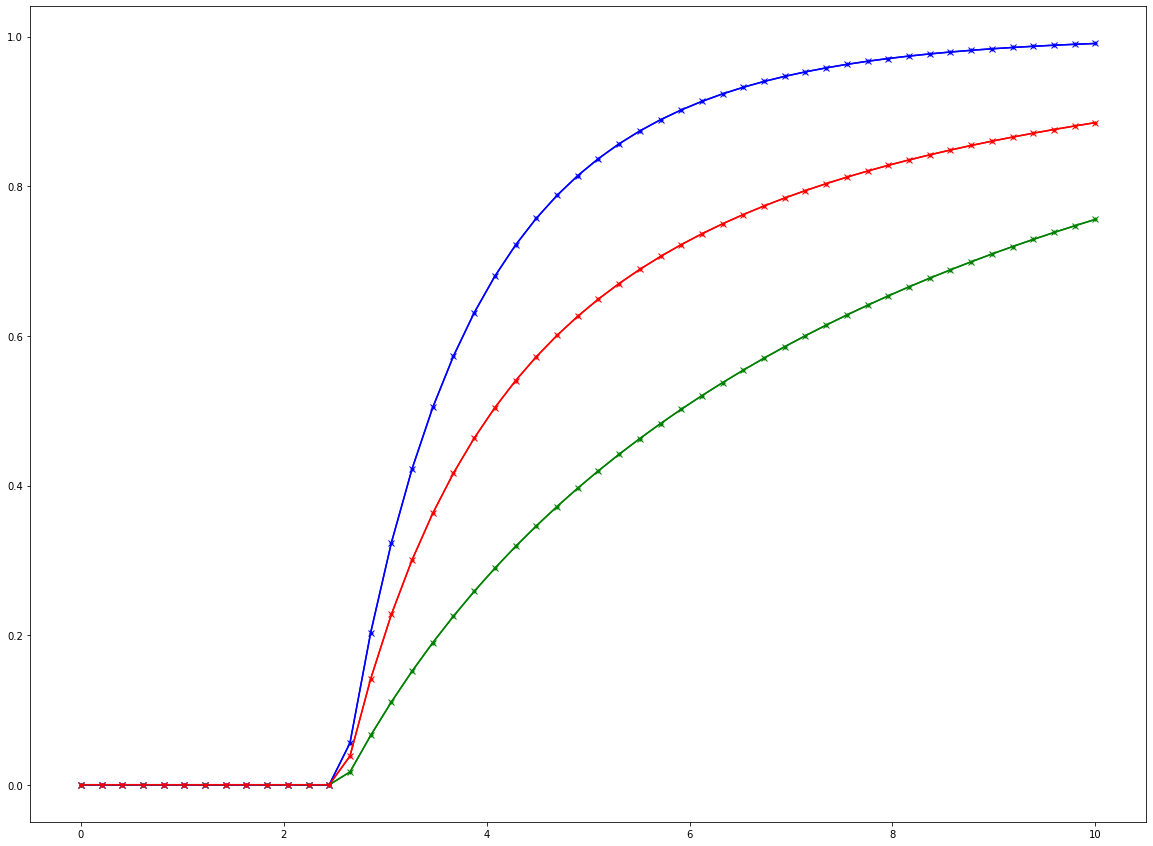

In [25]:
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
plot_anaylsis(pe_0to10, ax, legend_list, 'x-')
# plot_anaylsis(es_0to10, ax, legend_list, 'x-')
plot_anaylsis(pe_0to10_nosplit, ax, legend_list, '.-')

# mask ES also wrong: 0to9 and 0to10 not matched

In [26]:
es_0to9 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='es', 
                                msg='single_point',)

es_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='es', 
                                msg='test',)



m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: single_point
modelname: mask
itemname: es
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
101916:28
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/es/change_m/single_point/m0.45_T0.60_tm1_0.30_tm2_0.70/101916:28
total from load_analysis_results: {'3.122448979591837': 0.29619976017992844, '3.306122448979592': 0.37004782695898103, '3.489795918367347': 0.4339224171514327, '2.938775510204082': 0.21021268290470715, '0.0': 0.0, '2.7551020408163267': 0.10928621344531536, '3.673469387755102': 0.48952150095646607, '3.857142857142857': 0.5381930198414417, '4.040816326530613': 0.5810190148954598, '4.224489795918368': 0.618876855726141, '4.408163265306123': 0.6524844787635672, '4.591836734693878': 0.6824342703177931, '5.326530612244898': 0.7743919602954423, '4.775510204081633': 0.7092187626434222, '5.142857142857143': 0.7548765385581945, '4.959183673469388': 0.7332503443513414, '5.510204081632653': 0.7920477588429394, '5.6938775510204085': 0.8080591360279

In [27]:
es_0to10['mdl']

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

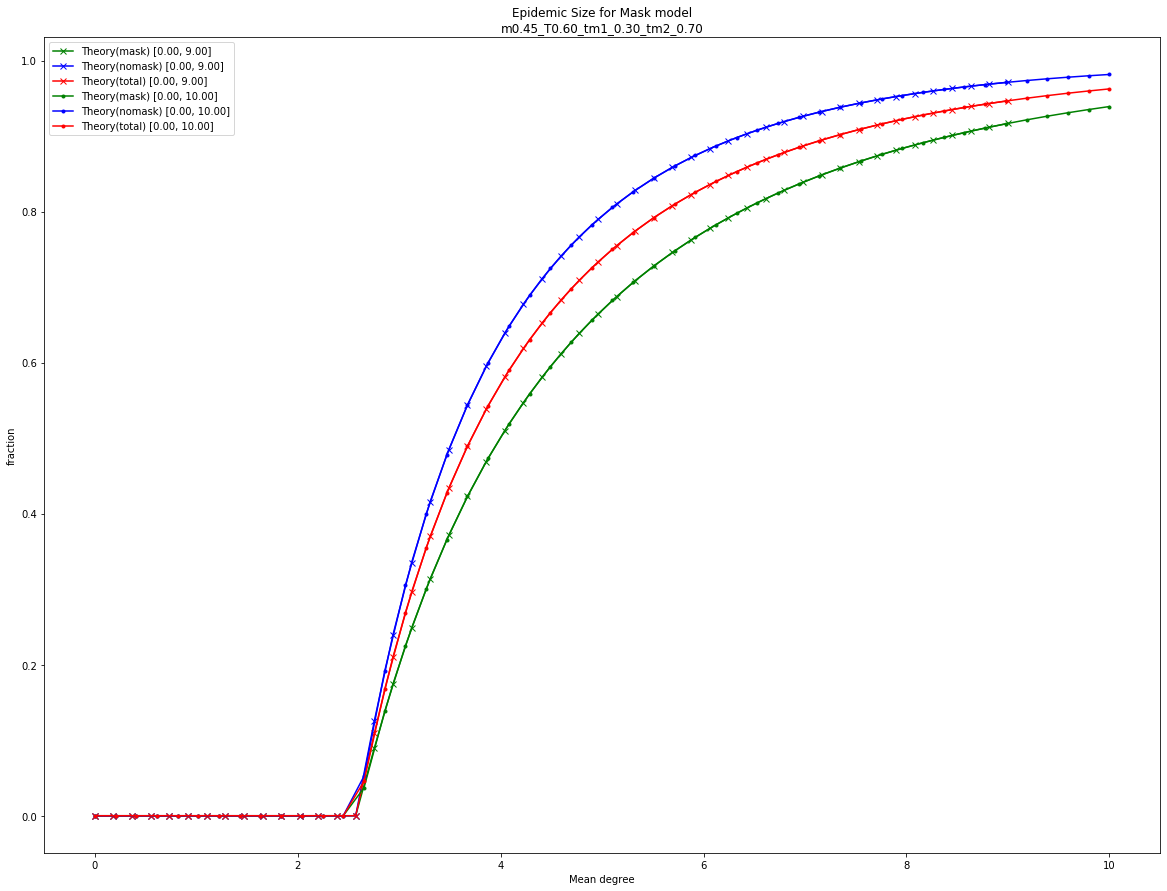

In [28]:
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
plot_anaylsis(es_0to9, ax, legend_list, 'x-')
plot_anaylsis(es_0to10, ax, legend_list, '.-')
title = "Epidemic Size for Mask model\nm%.2f_T%.2f_tm1_%.2f_tm2_%.2f" %(0.45, 0.6, 0.3, 0.7)  

set_ax(legend_list, 'Mean degree', 'fraction', title, ax)

# Check pe's single point with [0, 9] and [0, 10] 

In [29]:
pe_11 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='single_point',
                                time_analysis='101916:29')

pe_10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='single_point',
                                time_analysis='101916:28')


pe_9p79 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='single_point',
                                time_analysis='101916:27')



pe_3p06 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='single_point',
                                time_analysis='')


pe_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='test')

pe_0to9 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='0to9')


m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: single_point
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  101916:29
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/single_point/m0.45_T0.60_tm1_0.30_tm2_0.70/101916:29
total from load_analysis_results: {'11.0': 0.9043064700281249}
total after get_ordered_values_by_key: [0.9043064700281249]
m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: single_point
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  101916:28
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/single_point/m0.45_T0.60_tm1_0.30_tm2_0.70/101916:28
total from load_analysis_results: {'10.0': 0.8850671163843139}
total after get_ordered_values_by_key: [0.8850671163843139]
m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: single_point
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  101916:27
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/single_point/m0.45_T0.60_tm1_0.30_tm2_0.70/10

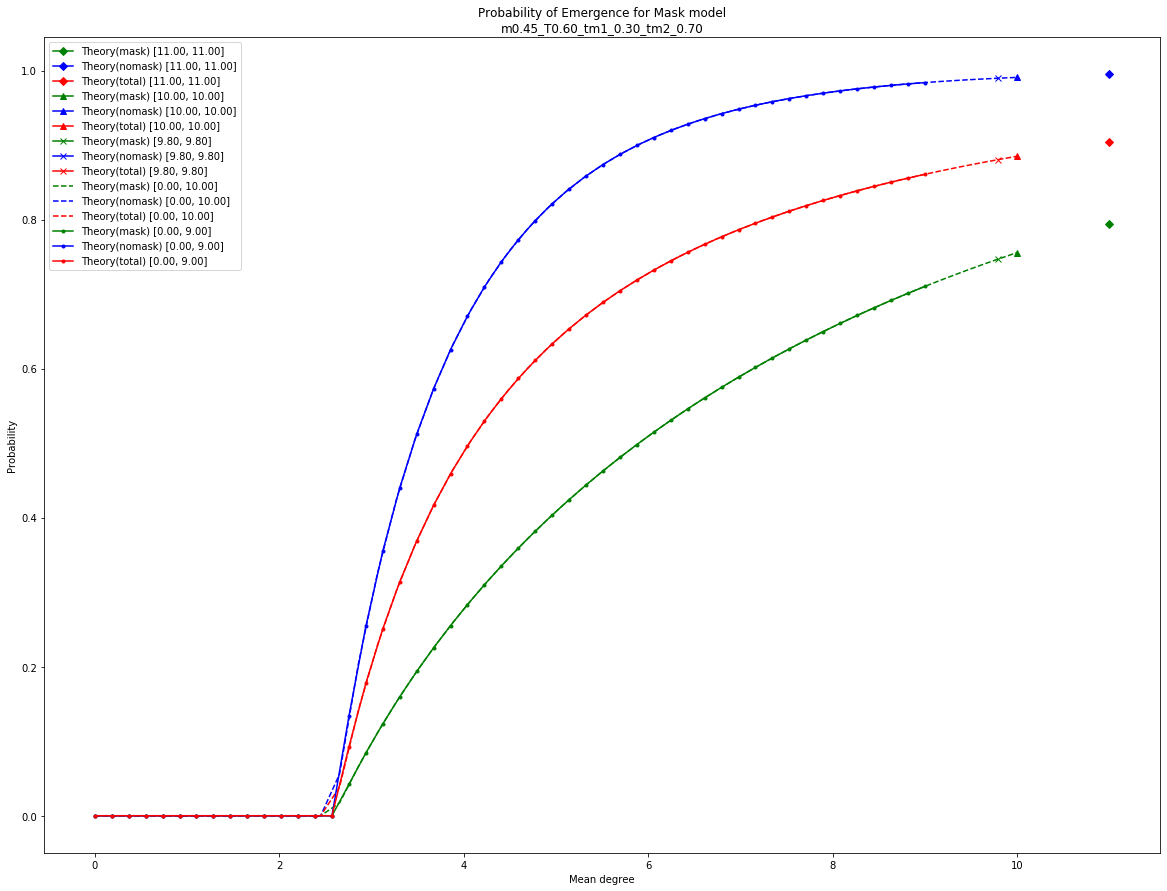

In [30]:
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []

plot_anaylsis(pe_11, ax, legend_list, 'D-')
plot_anaylsis(pe_10, ax, legend_list, '^-')
plot_anaylsis(pe_9p79, ax, legend_list, 'x-')

# plot_anaylsis(res_9, ax, legend_list, 'x-')


plot_anaylsis(pe_0to10, ax, legend_list, '--')
plot_anaylsis(pe_0to9, ax, legend_list, '.-')

title = "Probability of Emergence for Mask model\nm%.2f_T%.2f_tm1_%.2f_tm2_%.2f" %(0.45, 0.6, 0.3, 0.7)  

set_ax(legend_list, 'Mean degree', 'Probability', title, ax)

# Check pe's 0to3 to 0to9 v.s. 0to10 

In [97]:
# mask_list_0to3, paras_0to3, mdl_0to3 = get_processed_res(thr=0.05, n=5000, e=1000, 
#                          m=0.45, T=0.6, 
#                          tm1=0.3, tm2=0.7, 
#                          checkpoint=100, 
#                          msg='0to3', modelname='mask')

# mask_list_0to5, paras_0to5, mdl_0to5 = get_processed_res(thr=0.05, n=5000, e=1000, 
#                          m=0.45, T=0.6, 
#                          tm1=0.3, tm2=0.7, 
#                          checkpoint=100, 
#                          msg='0to5', modelname='mask')

# mask_list_0to7, paras_0to7, mdl_0to7 = get_processed_res(thr=0.05, n=5000, e=1000, 
#                          m=0.45, T=0.6, 
#                          tm1=0.3, tm2=0.7, 
#                          checkpoint=100, 
#                          msg='0to7', modelname='mask')
# mask_list_0to9, paras_0to9, mdl_0to9 = get_processed_res(thr=0.05, n=5000, e=1000, 
#                          m=0.45, T=0.6, 
#                          tm1=0.3, tm2=0.7, 
#                          checkpoint=100, 
#                          msg='0to9', modelname='mask')

mask_list_0to10, paras_0to10, mdl_0to10 = get_processed_res(thr=0.06, n=5000, e=10000, 
                         m=0.45, T=0.6, 
                         tm1=0.3, tm2=0.7, 
                         checkpoint=1000, 
                         msg='0to11', modelname='mask')

# mask_list_2p6to3, paras_2p6to3, mdl_2p6to3 = get_processed_res(thr=0.05, n=5000, e=1000, 
#                          m=0.45, T=0.6, 
#                          tm1=0.3, tm2=0.7, 
#                          checkpoint=100, 
#                          msg='test',
#                          time_exp='101222:58',
#                         modelname='mask')

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: 0to11
modelname: mask
itemname: es
change: 0
n: 5000
e: 10000
cp: 1000
time_exp:  
102516:24
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree5.353535353535354/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree5.353535353535354/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree5.353535353535354/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree5.353535353535354/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree5.35353535353535

cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree6.4646464646464645/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree6.4646464646464645/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree6.4646464646464645/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree6.4646464646464645/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree3.131313131313131/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_

cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree1.7171717171717171/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree1.7171717171717171/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree1.7171717171717171/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree1.7171717171717171/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree1.7171717171717171/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_t

cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree6.96969696969697/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree6.96969696969697/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree6.96969696969697/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree6.96969696969697/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree3.3333333333333335/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle100

cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree9.09090909090909/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree9.09090909090909/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree0.0/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree0.0/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree0.0/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree0.0/cp4
cp: 5


cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree7.575757575757575/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree1.2121212121212122/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree1.2121212121212122/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree1.2121212121212122/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree1.2121212121212122/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_

cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree3.0303030303030303/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree3.0303030303030303/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree3.0303030303030303/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree3.0303030303030303/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss1/meandegree3.0303030303030303/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_t

cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree5.05050505050505/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree5.05050505050505/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree5.05050505050505/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree8.181818181818182/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree8.181818181818182/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle100

cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree0.7070707070707071/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree0.7070707070707071/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree0.7070707070707071/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree0.7070707070707071/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree0.7070707070707071/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_t

cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree2.121212121212121/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree2.121212121212121/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree2.121212121212121/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree2.121212121212121/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree2.121212121212121/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10

cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree4.242424242424242/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree4.242424242424242/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree4.242424242424242/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree4.242424242424242/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree4.242424242424242/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10

cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree9.797979797979798/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree9.797979797979798/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree9.797979797979798/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree9.797979797979798/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/102516:24/ss2/meandegree9.797979797979798/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/mask/es/change_m/0to11/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10

In [98]:
len(mdl_0to10)

100

In [99]:
res_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='moredetailed0to10')
# res_0to3 = load_analysis_results(m=0.45, 
#                                 T=0.6, 
#                                 tm1=0.3, 
#                                 tm2=0.7, 
#                                 itemname='pe', 
#                                 msg='0to3')
# res_0to5 = load_analysis_results(m=0.45, 
#                                 T=0.6, 
#                                 tm1=0.3, 
#                                 tm2=0.7, 
#                                 itemname='pe', 
#                                 msg='0to5')
# res_0to7 = load_analysis_results(m=0.45, 
#                                 T=0.6, 
#                                 tm1=0.3, 
#                                 tm2=0.7, 
#                                 itemname='pe', 
#                                 msg='0to7')
# res_0to9 = load_analysis_results(m=0.45, 
#                                 T=0.6, 
#                                 tm1=0.3, 
#                                 tm2=0.7, 
#                                 itemname='pe', 
#                                 msg='0to9')
# res_2p6to3 = load_analysis_results(m=0.45, 
#                                 T=0.6, 
#                                 tm1=0.3, 
#                                 tm2=0.7, 
#                                 itemname='pe', 
#                                 msg='test',
#                                 time_analysis='101221:03')

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: moredetailed0to10
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
102516:21
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/moredetailed0to10/m0.45_T0.60_tm1_0.30_tm2_0.70/102516:21


In [100]:
len(res_0to10['mdl'])

100

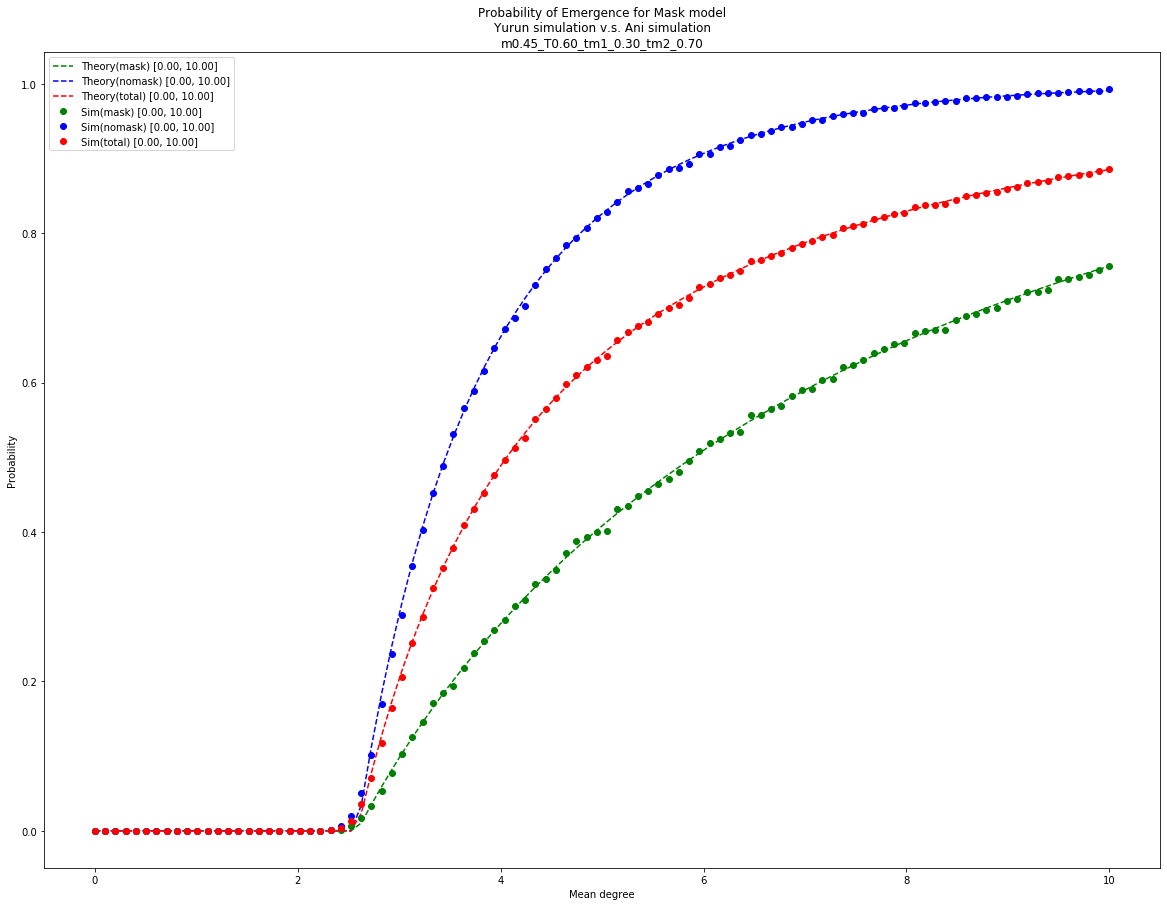

In [101]:
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []

# plot_anaylsis(res_0to3, ax, legend_list, '--')
# plot_sim(mask_list_0to3, paras_0to3, mdl_0to3, ax, legend_list, 'x')


# plot_anaylsis(res_0to5, ax, legend_list, '--')
# plot_sim(mask_list_0to5, paras_0to5, mdl_0to5, ax, legend_list, 'o')

# plot_anaylsis(res_0to7, ax, legend_list, '--')
# plot_sim(mask_list_0to7, paras_0to7, mdl_0to7, ax, legend_list, 'o')

# plot_anaylsis(res_0to9, ax, legend_list, '--')
# plot_sim(mask_list_0to9, paras_0to9, mdl_0to9, ax, legend_list, 'o')

# plot_anaylsis(res_2p6to3, ax, legend_list, '--')
# plot_sim(mask_list_2p6to3, paras_2p6to3, mdl_2p6to3, ax, legend_list, 'd')

plot_anaylsis(res_0to10, ax, legend_list, '--')
plot_sim(mask_list_0to10, paras_0to10, mdl_0to10, ax, legend_list, 'o')


title = "Probability of Emergence for Mask model\nYurun simulation v.s. Ani simulation\nm%.2f_T%.2f_tm1_%.2f_tm2_%.2f" %(0.45, 0.6, 0.3, 0.7)  

set_ax(legend_list, 'Mean degree', 'Probability', title, ax)

In [30]:
es_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='es', 
                                msg='test')

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: test
modelname: mask
itemname: es
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
101101:03
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/es/change_m/test/m0.45_T0.60_tm1_0.30_tm2_0.70/101101:03


In [31]:
res_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='es', 
                                msg='test')

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: test
modelname: mask
itemname: es
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
101101:03
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/es/change_m/test/m0.45_T0.60_tm1_0.30_tm2_0.70/101101:03


In [36]:
res_0to10['mask']

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.4e-323,
 0.03696378041172506,
 0.1381280777568617,
 0.22490975913328967,
 0.2999887611411479,
 0.3654484198767349,
 0.4228936114631441,
 0.47360959676828823,
 0.5186143381627105,
 0.5587425900706887,
 0.5946702415363304,
 0.6269605393482293,
 0.6560842963966329,
 0.6824307673919078,
 0.706336021221835,
 0.7280805986278385,
 0.7479093289749125,
 0.7660293006823313,
 0.7826220527844758,
 0.7978459935638588,
 0.8118366084184586,
 0.8247159546993723,
 0.8365888734072537,
 0.847549646212961,
 0.8576821864419727,
 0.8670592036428568,
 0.8757472219867328,
 0.8838060385850094,
 0.8912874180711869,
 0.8982400426892054,
 0.9047060747428399,
 0.9107246978414547,
 0.9163315482700619,
 0.921557773591792,
 0.9264327269181006,
 0.9309832722642561,
 0.9352328153399083,
 0.9392040025451853]

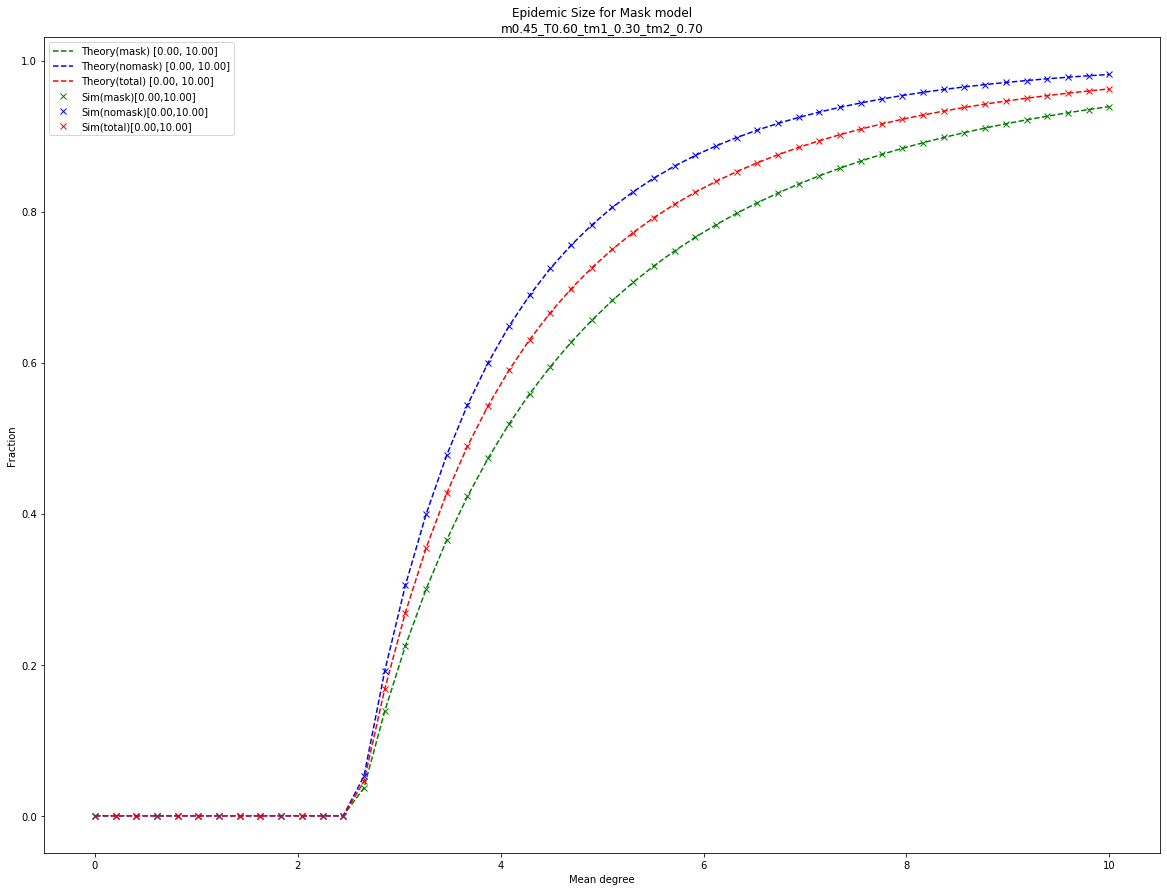

In [41]:
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []
plot_anaylsis(es_0to10, ax, legend_list, '--')
ax.plot(res_0to10['mdl'], res_0to10['mask'], 'gx')
ax.plot(res_0to10['mdl'], res_0to10['nomask'], 'bx')
ax.plot(res_0to10['mdl'], res_0to10['ttl'], 'rx')
legend_list.append('Sim(mask)[0.00,10.00]')
legend_list.append('Sim(nomask)[0.00,10.00]')
legend_list.append('Sim(total)[0.00,10.00]')

title = "Epidemic Size for Mask model\nm%.2f_T%.2f_tm1_%.2f_tm2_%.2f" %(0.45, 0.6, 0.3, 0.7)  

set_ax(legend_list, 'Mean degree', 'Fraction', title, ax)

# See if Ani's simulation's results also like this

In [34]:
res_0to10 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='test')
res_0to3 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='0to3')
res_0to5 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='0to5')
res_0to7 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='0to7')
res_0to9 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='0to9')
res_2p6to3 = load_analysis_results(m=0.45, 
                                T=0.6, 
                                tm1=0.3, 
                                tm2=0.7, 
                                itemname='pe', 
                                msg='test',
                                time_analysis='101221:03')

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: test
modelname: mask
itemname: pe
change: 0
n: 50
e: 10
cp: 5
time_analysis:  
101222:54
Analysis path: /mnt/hdd-storage/ytian/ns/analysis/mask/pe/change_m/test/m0.45_T0.60_tm1_0.30_tm2_0.70/101222:54
total from load_analysis_results: {'0.40816326530612246': 1.0095119185038472e-11, '0.20408163265306123': 1.6092682741941646e-14, '1.0204081632653061': 1.6460547369590018e-10, '0.6122448979591837': 2.2007395905632166e-13, '0.8163265306122449': 9.212569596073196e-12, '1.6326530612244898': 2.5217780086350674e-10, '1.4285714285714286': 3.4025610107235594e-11, '1.2244897959183674': 2.6937618802236333e-12, '1.836734693877551': 5.189920715409358e-12, '3.4693877551020407': 0.3629017853801663, '3.673469387755102': 0.41661745955782936, '3.8775510204081636': 0.4633039110454205, '2.0408163265306123': 1.4287737659657296e-12, '3.2653061224489797': 0.30059642821182836, '3.0612244897959187': 0.22767428944701273, '2.857142857142857': 0.14146028079848283, '2.2448979591

In [35]:
thr = 0.05
ani_list_0to3, paras_0to3, mdl_0to3 = get_processed_res(thr=thr, n=5000, e=10000, 
                         m=0.45, T=0.6, 
                         tm1=0.3, tm2=0.7, 
                         checkpoint=1000, 
                         msg='0to3', modelname='ani-mask')

ani_list_0to5, paras_0to5, mdl_0to5 = get_processed_res(thr=thr, n=5000, e=10000, 
                         m=0.45, T=0.6, 
                         tm1=0.3, tm2=0.7, 
                         checkpoint=1000, 
                         msg='0to5', modelname='ani-mask')

ani_list_0to7, paras_0to7, mdl_0to7 = get_processed_res(thr=thr, n=5000, e=10000, 
                         m=0.45, T=0.6, 
                         tm1=0.3, tm2=0.7, 
                         checkpoint=1000, 
                         msg='0to7', modelname='ani-mask')
ani_list_0to9, paras_0to9, mdl_0to9 = get_processed_res(thr=thr, n=5000, e=10000, 
                         m=0.45, T=0.6, 
                         tm1=0.3, tm2=0.7, 
                         checkpoint=1000, 
                         msg='0to9', modelname='ani-mask', 
                         time_exp='101918:33')

ani_list_0to10, paras_0to10, mdl_0to10 = get_processed_res(thr=thr, n=5000, e=10000, 
                         m=0.45, T=0.6, 
                         tm1=0.3, tm2=0.7, 
                         checkpoint=1000, 
                         msg='0to9', modelname='ani-mask', time_exp=
                                                          '101920:44')

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: 0to3
modelname: ani-mask
itemname: es
change: 0
n: 5000
e: 10000
cp: 1000
time_exp:  
101919:11
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree0.18367346938775508/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree0.18367346938775508/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree0.18367346938775508/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree0.18367346938775508/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/

cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree2.2653061224489797/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree3.0/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree3.0/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree3.0/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree3.0/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree3.0/cp5

cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree0.12244897959183673/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree2.877551020408163/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree2.877551020408163/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree2.877551020408163/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree2.877551020408163/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30

cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree0.061224489795918366/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree0.36734693877551017/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree0.36734693877551017/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree0.36734693877551017/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss1/meandegree0.36734693877551017/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60

cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree0.7346938775510203/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree0.7346938775510203/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree1.836734693877551/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree1.836734693877551/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree1.836734693877551/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30

cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree1.346938775510204/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree2.693877551020408/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree2.693877551020408/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree2.693877551020408/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree2.693877551020408/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_t

cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree0.42857142857142855/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree0.42857142857142855/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree0.42857142857142855/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree0.42857142857142855/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree0.42857142857142855/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm

cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree1.2857142857142856/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree1.2857142857142856/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree1.2857142857142856/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree1.2857142857142856/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101919:11/ss2/meandegree1.2857142857142856/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to3/m0.45_T0.60_tm1_0.3

cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss1/meandegree2.3469387755102042/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss1/meandegree2.3469387755102042/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss1/meandegree2.3469387755102042/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss1/meandegree2.3469387755102042/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss1/meandegree2.3469387755102042/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.3

cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss1/meandegree3.163265306122449/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss1/meandegree3.163265306122449/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss1/meandegree3.163265306122449/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss1/meandegree3.163265306122449/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss1/meandegree3.163265306122449/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_t

cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree0.20408163265306123/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree4.081632653061225/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree4.081632653061225/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree4.081632653061225/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree4.081632653061225/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30

cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree1.1224489795918369/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree1.1224489795918369/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree1.1224489795918369/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree2.3469387755102042/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree2.3469387755102042/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0

cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree3.673469387755102/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree3.673469387755102/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree3.4693877551020407/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree3.4693877551020407/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:49/ss2/meandegree3.4693877551020407/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to5/m0.45_T0.60_tm1_0.3

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: 0to7
modelname: ani-mask
itemname: es
change: 0
n: 5000
e: 10000
cp: 1000
time_exp:  
101922:18
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree1.7142857142857142/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree1.7142857142857142/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree1.7142857142857142/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree1.7142857142857142/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/mean

cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree5.0/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree4.285714285714286/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree4.285714285714286/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree4.285714285714286/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree4.285714285714286/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_

cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree4.0/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree4.0/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree4.0/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree4.0/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree4.0/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss1/meandegree4.0/cp10
cp: 1
Experime

cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree1.7142857142857142/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree1.7142857142857142/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree0.5714285714285714/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree0.5714285714285714/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree0.5714285714285714/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0

cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree6.7142857142857135/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree6.7142857142857135/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree6.7142857142857135/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree6.7142857142857135/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree6.7142857142857135/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0

cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree2.142857142857143/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree2.142857142857143/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree2.142857142857143/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree2.142857142857143/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101922:18/ss2/meandegree2.142857142857143/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to7/m0.45_T0.60_tm1_0.30_tm2

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: 0to9
modelname: ani-mask
itemname: es
change: 0
n: 5000
e: 10000
cp: 1000
time_exp:  101918:33
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree8.26530612244898/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree8.26530612244898/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree8.26530612244898/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree8.26530612244898/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree8.2

cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree5.142857142857143/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree5.142857142857143/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree5.142857142857143/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree5.142857142857143/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree9.0/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_

cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree2.7551020408163267/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree2.7551020408163267/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree2.7551020408163267/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree2.7551020408163267/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree2.7551020408163267/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.3

cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree5.510204081632653/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree5.510204081632653/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree5.510204081632653/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree5.510204081632653/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss1/meandegree5.510204081632653/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2

cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree6.244897959183674/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree6.612244897959184/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree6.612244897959184/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree6.612244897959184/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree6.612244897959184/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_t

cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree6.428571428571429/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree6.428571428571429/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree6.428571428571429/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree6.428571428571429/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree6.428571428571429/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_t

cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree3.673469387755102/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree3.673469387755102/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree3.673469387755102/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree4.040816326530613/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101918:33/ss2/meandegree4.040816326530613/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_t

m: 0.45
T: 0.6
tm1: 0.3
tm2: 0.7
msg: 0to9
modelname: ani-mask
itemname: es
change: 0
n: 5000
e: 10000
cp: 1000
time_exp:  101920:44
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree3.0612244897959187/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree3.0612244897959187/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree3.0612244897959187/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree3.0612244897959187/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meand

cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree4.4897959183673475/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree4.4897959183673475/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree4.4897959183673475/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree4.4897959183673475/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree4.4897959183673475/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.3

cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree9.591836734693878/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree9.591836734693878/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree9.591836734693878/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree2.0408163265306123/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss1/meandegree2.0408163265306123/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30

cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree2.6530612244897958/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree2.6530612244897958/cp10
cp: 1
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree0.40816326530612246/cp1
cp: 2
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree0.40816326530612246/cp2
cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree0.40816326530612246/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm

cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree6.326530612244898/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree6.326530612244898/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree6.326530612244898/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree6.326530612244898/cp8
cp: 9
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree6.326530612244898/cp9
cp: 10
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm

cp: 3
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree2.857142857142857/cp3
cp: 4
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree2.857142857142857/cp4
cp: 5
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree2.857142857142857/cp5
cp: 6
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree2.857142857142857/cp6
cp: 7
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2_0.70/n5000_ttle10000/101920:44/ss2/meandegree2.857142857142857/cp7
cp: 8
Experiment path: /mnt/hdd-storage/ytian/ns/simulation/ani-mask/es/change_m/0to9/m0.45_T0.60_tm1_0.30_tm2

In [36]:
mdl_0to10

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

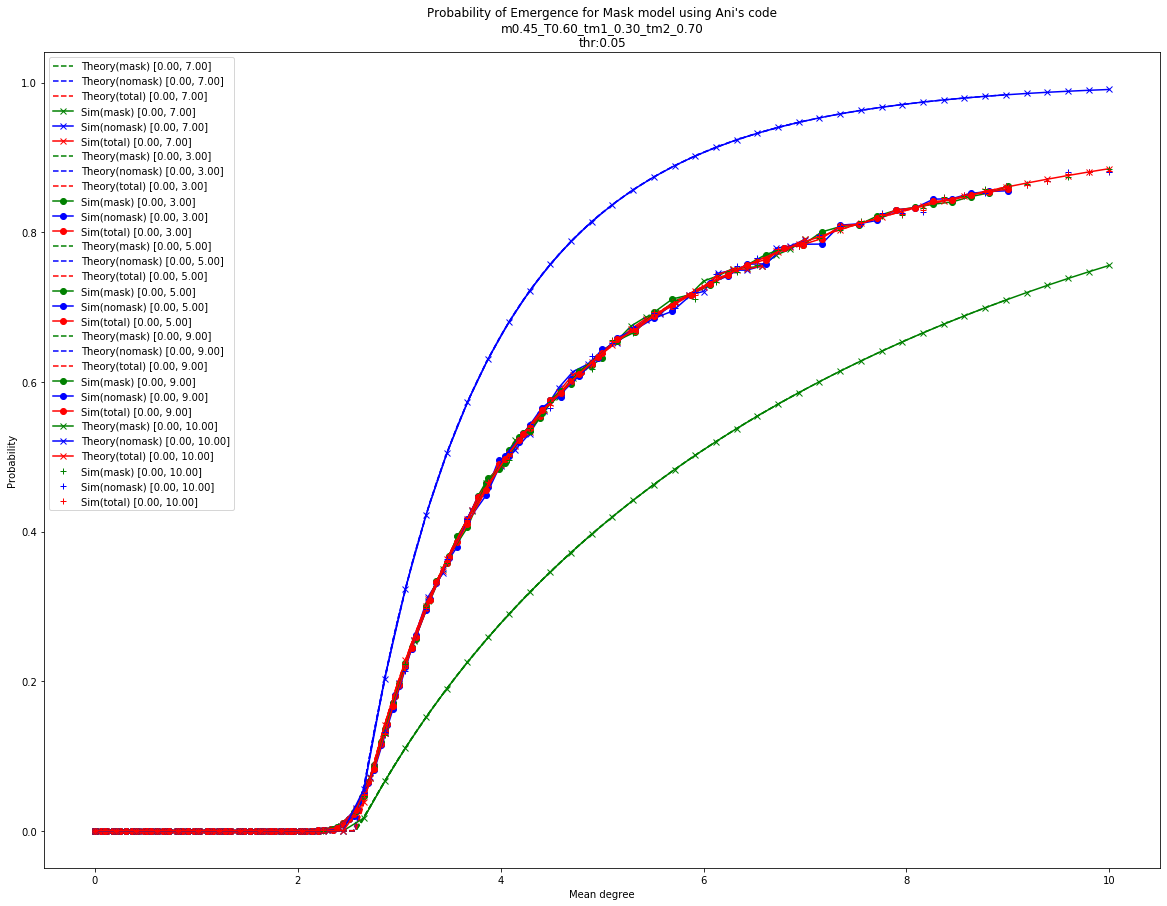

In [37]:
fig, ax = plt.subplots(figsize=(20,15))
legend_list = []



plot_anaylsis(res_0to7, ax, legend_list, '--')
plot_sim(ani_list_0to7, paras_0to7, mdl_0to7, ax, legend_list, 'x-')

plot_anaylsis(res_0to3, ax, legend_list, '--')
plot_sim(ani_list_0to3, paras_0to3, mdl_0to3, ax, legend_list, 'o-')

plot_anaylsis(res_0to5, ax, legend_list, '--')
plot_sim(ani_list_0to5, paras_0to5, mdl_0to5, ax, legend_list, 'o-')

plot_anaylsis(res_0to9, ax, legend_list, '--')
plot_sim(ani_list_0to9, paras_0to9, mdl_0to9, ax, legend_list, 'o-')

plot_anaylsis(res_0to10, ax, legend_list, 'x-')
plot_sim(ani_list_0to10, paras_0to10, mdl_0to10, ax, legend_list, '+')

# plot_anaylsis(res_0to10, ax, legend_list, '--')
# plot_sim(ani_list_0to10, paras_0to10, mdl_0to10, ax, legend_list, '+-')

# plot_anaylsis(res_0to9, ax, legend_list, '--')
# plot_sim(mask_list_0to3, paras_0to3, mdl_0to3, ax, legend_list, '.-')
# plot_sim(mask_list_0to5, paras_0to5, mdl_0to5, ax, legend_list, 'd')
# plot_sim(mask_list_0to7, paras_0to7, mdl_0to7, ax, legend_list, 'd')

# plot_anaylsis(res_0to3, ax, legend_list, '--')
# plot_sim(mask_list_0to3, paras_0to3, mdl_0to3, ax, legend_list, 'd-')

# plot_anaylsis(res_0to10, ax, legend_list, 'P-')
# plot_sim(res_list_0to10, paras_0to10, mdl_0to10, ax, legend_list, 'P')


title = "Probability of Emergence for Mask model using Ani's code\nm%.2f_T%.2f_tm1_%.2f_tm2_%.2f\nthr:%.2f" %(0.45, 0.6, 0.3, 0.7, thr)  

set_ax(legend_list, 'Mean degree', 'Probability', title, ax)

# Change m = [0.1, 0.9], mean_degree = 5

In [38]:
degree_min = 0
degree_max = 10 # para md in simulation script
interval_num = 50 # para ns in simulation script
mean_degree_list = np.linspace(degree_min, degree_max, interval_num)

In [39]:
load_dm5_change_ES(thrVal0=0.05, thrVal1=0.05, metric_analysis = 'tm', which_tm=2)

NameError: name 'load_dm5_change_ES' is not defined

In [40]:
# load_dm5_change_m_ES(thrVal0 = 0.03, thrVal1 = 0.03)

# Plot ES theory v.s. simulation

In [41]:
'''Load  ES analysis results'''
print('Load ES analysis results')

# model_names = ['Mask', 'Mutation']
model_names = ['Mask',]
metric_analysis = 'm'
para_setting = 'm0.6_T0.70_tm1_0.40_tm2_0.60'

infection_size = load_ES_analysis_results(metric_analysis, para_setting, model_names, exp_time='092618:13')



infection_size['Mask'][metric_analysis][para_setting][0][10] = 0
infection_size['Mask'][metric_analysis][para_setting][1][10] = 0
infection_size['Mask'][metric_analysis][para_setting][2][10] = 0


# infection_size[model_names[1]][metric_analysis][para_setting][0][10] = 0
# infection_size[model_names[1]][metric_analysis][para_setting][1][10] = 0
# infection_size[model_names[1]][metric_analysis][para_setting][2][10] = 0

ES0 = np.array(infection_size['Mask'][metric_analysis][para_setting][0]) 
ES1 = np.array(infection_size['Mask'][metric_analysis][para_setting][1]) 
ES = ES1 + ES0



Load ES analysis results


NameError: name 'load_ES_analysis_results' is not defined

In [108]:
# '''Load  raw simulation results for ES(new path)'''

# sim_model_names = ['Mask2', ]
# base_happy_path = data_path + 'simulation/'
# sim_metric = 'm'
# exp_setting = 'n5000_totalexp1000'
# sim_model_name = sim_model_names[0]

# raw_ss1, paras = load_happyfeet_raw_results(base_happy_path, sim_metric, 
#                                     para_setting, 
#                                     exp_setting, 
#                                     sim_model_name, 
#                                     start_strain=0, )

# raw_ss2, paras = load_happyfeet_raw_results(base_happy_path, sim_metric, 
#                                     para_setting, 
#                                     exp_setting, 
#                                     sim_model_name, 
#                                     start_strain=1, )


# m = paras['m']
# T = paras['T']
# tm1 = paras['tm1']
# tm2 = paras['tm2']
# paras

In [109]:
'''
Play with threshold for ES using raw results
'''
degree_min = 0
degree_max = 10 # para md in simulation script
interval_num = 50 # para ns in simulation script
mean_degree_list = np.linspace(degree_min, degree_max, interval_num)

check_point = paras['e']
thrVal = 0.0001
es0_s1, es1_s1, es_s1, pe0, ml0 = resolve_rawdata(raw_ss1, check_point, thrVal)
# es0_s2, es1_s2, es_s2, pe1, ml1 = resolve_rawdata(raw_ss2, check_point, thrVal)

es0 = es0_s1
es1 = es1_s1 

es = es0 + es1

# print(ml0)
start = np.where(mean_degree_list == ml0[0])[0][0]
end   = np.where(mean_degree_list == ml0[-1])[0][0] + 1

mean_degree_list_plot = mean_degree_list[start: end]
ES0_plot = list(ES0)[start: end]
ES1_plot = list(ES1)[start: end]
ES_plot  = list(ES)[start: end]
# print(ml0)
# print(mean_degree_list_plot)

NameError: name 'paras' is not defined

NameError: name 'ES0_mu' is not defined

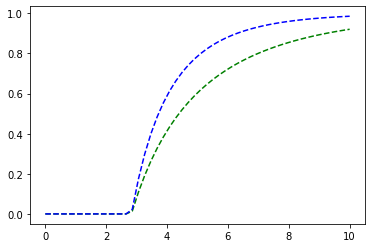

In [110]:
'''
Plot ES analysis v.s. simulation
'''

mean_degree_list_plot = mean_degree_list

# plt.plot(mean_degree_list_plot, ES0_plot, 'g--')
# plt.plot(mean_degree_list_plot, ES1_plot, 'b--')
# plt.plot(mean_degree_list_plot, ES_plot, 'r--')

plt.plot(mean_degree_list_plot, ES0, 'g--')
plt.plot(mean_degree_list_plot, ES1, 'b--')
# plt.plot(mean_degree_list_plot, ES, 'r--')

plt.plot(mean_degree_list_plot, ES0_mu, 'g.')
plt.plot(mean_degree_list_plot, ES1_mu, 'b.')
# plt.plot(mean_degree_list_plot, ES_mu, 'r.')


# plt.plot(mean_degree_list, infection_size[model_names[1]][metric_analysis][para_setting][0], 'g.')
# plt.plot(mean_degree_list, infection_size[model_names[1]][metric_analysis][para_setting][1], 'b.')
# plt.plot(mean_degree_list, np.array(infection_size[model_names[1]][metric_analysis][para_setting][0]) + np.array(infection_size[model_names[1]][metric_analysis][para_setting][1]), 'r.')


# plt.scatter(mean_degree_list_plot, np.array(es0), facecolors='none', edgecolors='g')
# plt.scatter(mean_degree_list_plot, np.array(es1), facecolors='none', edgecolors='b')
# plt.scatter(mean_degree_list_plot, np.array(es) , facecolors='none', edgecolors='r')

# plt.scatter(mean_degree_list, np.array(es0_) , 'g+')
# plt.plot(mean_degree_list, np.array(es1_) , 'b+')
# plt.plot(mean_degree_list, np.array(es_), 'r+')

# plt.plot(mean_degree_list, np.array(if0_sirius) , 'gx')
# plt.plot(mean_degree_list, np.array(if1_sirius) , 'bx')
# plt.plot(mean_degree_list, np.array(if0_sirius)  + np.array(if1_sirius), 'rx')

plt.legend([
#             "Mask theory(mask)", 
#             "Mask theory(no mask)",
#             "Mask theory(total)",
            "Theory(mask)", 
            "Theory(no mask)",
#             "Theory(total)",
    
            "Mutation theory(S1)", 
            "Mutation theory(S2)",
#             "Mutation theory(total)", 

#            "Mask simulation(mask)", 
#             "Mask simulation(no mask)",
#             "Mask simulation(total)",
#             "Simulation(mask)", 
#             "Simulation(no mask)",
#             "Simulation(total)",
],)

plt.xlabel("Mean degree")
plt.ylabel("Fraction")
print(para_setting)
title = "Epidemic Size\nMask model v.s. Mutation model"
plt.title(title)

# Mask PE theory v.s. PE simualtion

In [6]:
'''Load  PE analysis results'''
para_setting = 'm0.45_T0.60_tm1_0.30_tm2_0.70'
model_names = ['Mask',]
# '092618:13' # 0.6_0.7_0.4_0.6
# 091519:10 # m0.45_T0.60_tm1_0.30_tm2_0.70
metric_analysis = 'm'
prob_emergence = load_PE_analysis_results('m', para_setting, model_names, exp_time='091519:10')

prob_emergence[model_names[0]][metric_analysis][para_setting][0][10] = 0
prob_emergence[model_names[0]][metric_analysis][para_setting][1][10] = 0
prob_emergence[model_names[0]][metric_analysis][para_setting][2][10] = 0

# prob_emergence[model_names[1]][metric_analysis][para_setting][0][10] = 0
# prob_emergence[model_names[1]][metric_analysis][para_setting][1][10] = 0
# prob_emergence[model_names[1]][metric_analysis][para_setting][2][10] = 0

PE0 = np.array(prob_emergence[model_names[0]][metric_analysis][para_setting][0])
PE1 = np.array(prob_emergence[model_names[0]][metric_analysis][para_setting][1])



Model  Mask
change  m
m0.45_T0.60_tm1_0.30_tm2_0.70
091519:10
Here: ./analysis_scripts/pe_analysis/Mask_PE_Analysis_change_m/m0.45_T0.60_tm1_0.30_tm2_0.70/091519:10/Results/
mdlist from PE analysis: ['0.0', '0.20408163265306123', '0.40816326530612246', '0.6122448979591837', '0.8163265306122449', '1.0204081632653061', '1.2244897959183674', '1.4285714285714286', '1.6326530612244898', '1.836734693877551', '10.0', '2.0408163265306123', '2.2448979591836737', '2.4489795918367347', '2.6530612244897958', '2.857142857142857', '3.0612244897959187', '3.2653061224489797', '3.4693877551020407', '3.673469387755102', '3.8775510204081636', '4.081632653061225', '4.285714285714286', '4.4897959183673475', '4.6938775510204085', '4.8979591836734695', '5.1020408163265305', '5.3061224489795915', '5.510204081632653', '5.714285714285714', '5.918367346938775', '6.122448979591837', '6.326530612244898', '6.530612244897959', '6.73469387755102', '6.938775510204081', '7.142857142857143', '7.346938775510204', '7.5510

In [166]:
# '''Load  raw simulation results for ES(new path)'''
# metric_analysis = 'm'
# para_setting = 'm0.45_T0.60_tm1_0.30_tm2_0.70'
# sim_model_names = ['Mask2', ]
# base_happy_path = 'simulation/'
# sim_metric = 'm'
# exp_setting = 'n50000_totalexp10000'
# sim_model_name = sim_model_names[0]

# raw_ss1, paras = load_happyfeet_raw_results(base_happy_path, sim_metric, 
#                                     para_setting, 
#                                     exp_setting, 
#                                     sim_model_name, 
#                                     start_strain=0, )

# raw_ss2, paras = load_happyfeet_raw_results(base_happy_path, sim_metric, 
#                                     para_setting, 
#                                     exp_setting, 
#                                     sim_model_name, 
#                                     start_strain=1, )

# m = paras['m']
# T = paras['T']
# tm1 = paras['tm1']
# tm2 = paras['tm2']
# print(paras)

# PE  = PE0 * m + PE1 * (1 - m)

# '''
# Play with threshold for PE using raw results
# '''

# check_point = paras['e']
# thrVal0 = 0.2

# es0_s1, es1_s1, es_s1, pe0, mlist0 = resolve_rawdata(raw_ss1, check_point, thrVal0)
# es0_s2, es1_s2, es_s2, pe1, mlist1 = resolve_rawdata(raw_ss2, check_point, thrVal0)


# if len(mlist0) < len(mlist1):
#     mlist = mlist0
#     pe1 = pe1[: len(pe0)]
# else:
#     mlist = mlist1
#     pe0 = pe0[: len(pe1)]
    
# pe = pe0 * m + pe1 * (1 - m)
    
# start = np.where(mean_degree_list == mlist[0])[0][0]
# end   = np.where(mean_degree_list == mlist[-1])[0][0] + 1

# mean_degree_list_plot = mean_degree_list[start: end]
# PE0_plot = list(PE0)[start: end]
# PE1_plot = list(PE1)[start: end]
# PE_plot  = list(PE)[start: end]
    
    


In [167]:
# get_md5_pe(0.15)
# get_transition_points(0.15)

092713:26
{'n': 500000, 'e': 10000, 'm': 0.45, 'T': 0.6, 'tm1': 0.3, 'tm2': 0.7, 'th': 0.05, 'md': 3, 'ns': 10}
100217:44
{'n': 5000000, 'e': 10000, 'm': 0.45, 'T': 0.6, 'tm1': 0.3, 'tm2': 0.7, 'th': 0.05, 'md': 10, 'ns': 50}
['2.0', '2.111111111111111', '2.2222222222222223', '2.3333333333333335', '2.4444444444444446', '2.5555555555555554', '2.6666666666666665', '2.7777777777777777', '2.888888888888889', '3.0']
['2.0', '2.111111111111111', '2.2222222222222223', '2.3333333333333335', '2.4444444444444446', '2.5555555555555554', '2.6666666666666665', '2.7777777777777777', '2.888888888888889', '3.0']
mlist [2.0, 2.111111111111111, 2.2222222222222223, 2.3333333333333335, 2.4444444444444446, 2.5555555555555554, 2.6666666666666665, 2.7777777777777777, 2.888888888888889, 3.0]
m0.45_T0.60_tm1_0.30_tm2_0.70


Text(0.5, 1.0, 'Probability of Emergence for Mask model\n(Near threshold: 0.05) ')

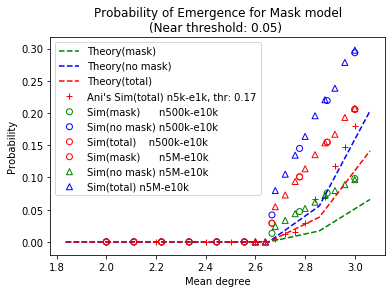

In [98]:
'''
Load raw data from Parellel & Play with threshold for PE
'''

degree_min = 0
degree_max = 10 # para md in simulation script
interval_num = 50 # para ns in simulation script
mean_degree_list = np.linspace(degree_min, degree_max, interval_num,)

thrVal0 = 0.05# works for m0.45_T0.60_tm1_0.30_tm2_0.70
thrVal1 = 0.05


# thrVal0 = 0.141
# thrVal1 = 0.141 # works for m0.6_T0.70_tm1_0.40_tm2_0.60

raw0, raw1, paras = load_sirius_rawdata('m', para_setting, exp_time='092713:26')
print(paras)
es0, pe0, mlist0 = resolve_sirius_raw(raw0, thrVal0)
es1, pe1, mlist1 = resolve_sirius_raw(raw1, thrVal1)

# raw0_, raw1_, paras_ = load_sirius_rawdata('m', para_setting, exp_time='092817:49')
raw0_, raw1_, paras_ = load_sirius_rawdata('m', para_setting, exp_time='100217:44')

print(paras_)
es0_, pe0_, mlist0_ = resolve_sirius_raw(raw0_, thrVal0)
es1_, pe1_, mlist1_ = resolve_sirius_raw(raw1_, thrVal1)

print(mlist0)
print(mlist1)

if len(mlist0) < len(mlist1):
    mlist = mlist0
    pe1 = pe1[: len(pe0)]
else:
    mlist = mlist1
    pe0 = pe0[: len(pe1)]
m = paras['m']
pe = pe0 * m + pe1 * (1 - m)
PE = PE0 * m + PE1 * (1 - m)

mlist = [float(i) for i in mlist]
mean_degree_list_plot = mlist
print('mlist', mlist)




mean_degree_list_plot_ = [2.6, 2.64, 2.68, 2.72, 2.76, 2.8, 2.84, 2.88, 2.92, 2.96, 3.0]

# start = np.where(mean_degree_list == mlist[0])[0][0]
# end   = np.where(mean_degree_list == max(mlist))[0][0]



# mean_degree_list_plot = mean_degree_list[start: end]
# PE0_plot = list(PE0)[start: end]
# PE1_plot = list(PE1)[start: end]
# PE_plot  = list(PE)[start: end]


'''
Plot PE analysis v.s. simulation
'''


fig, ax = plt.subplots()
# ax.plot(mean_degree_list_plot, PE0, 'g--')
# ax.plot(mean_degree_list_plot, PE1, 'b--')
# ax.plot(mean_degree_list_plot, PE, 'r--')

# start = 11 # M0.6
# end   = 16 # M0.6

start = 9

end   = 16

ax.plot(mean_degree_list[start:end], PE0[start:end], 'g--')
ax.plot(mean_degree_list[start:end], PE1[start:end], 'b--')
ax.plot(mean_degree_list[start:end], PE[start:end], 'r--')


ax.scatter(mean_degree_list_plot, pe0, facecolors='none', edgecolors='g')
ax.scatter(mean_degree_list_plot, pe1, facecolors='none', edgecolors='b')
ax.scatter(mean_degree_list_plot, pe0 * m + pe1 * (1 - m), facecolors='none', edgecolors='r')
ax.scatter(mean_degree_list_plot, pe, facecolors='none', edgecolors='r')

ax.scatter(mean_degree_list_plot_, pe0_, marker='^', facecolors='none', edgecolors='g')
ax.scatter(mean_degree_list_plot_, pe1_, marker='^', facecolors='none', edgecolors='b')
ax.scatter(mean_degree_list_plot_, pe0_ * m + pe1_ * (1 - m), marker='^', facecolors='none', edgecolors='r')

mean_degree_list_ani = [2.2, 2.4, 2.5, 2.6, 2.64, 2.68, 2.72, 2.76, 2.8, 2.84, 2.88, 2.92, 2.96, 3.0]
fractionDic_list = list(np.load('simulation_scripts/ani_thr_raw.npy'))
fractionDic_list = [list(i) for i in fractionDic_list]
# print(fractionDic)


# plt.plot(x_coordinates, y_coordinates, 'r-.')
pe_list = []
numExp = 1000
for idx, mean_degree in enumerate(mean_degree_list_ani):
    fractionDic = fractionDic_list[idx]
    # output average epidemic sizes
    av_epidemic_size = 0
    num_epidemics = 0
    for i in range(numExp):
        if fractionDic[i] >= 0.17:
            av_epidemic_size += fractionDic[i]
            num_epidemics += 1
    av_epidemic_size  = div(av_epidemic_size,num_epidemics)
    av_prob_emergence = div(num_epidemics, numExp)
    pe_list.append(av_prob_emergence)
#     print('Average size of the epidemic (conditioned on emergence) is ' + str(av_epidemic_size))
#     print('Average probability of emergence is ' + str(av_prob_emergence))
ax.plot(mean_degree_list_ani, pe_list, 'r+')


plt.legend([
            "Theory(mask)", 
            "Theory(no mask)",
#             "Threshold: 0.05",
            "Theory(total)",
    "Ani's Sim(total) n5k-e1k, thr: 0.17",
#             "Mutation theory(Q1)", 
#             "Mutation theory(Q2)",
            "Sim(mask)      n500k-e10k", 
            "Sim(no mask) n500k-e10k",
            "Sim(total)    n500k-e10k",
            "Sim(mask)      n5M-e10k", 
            "Sim(no mask) n5M-e10k",
            "Sim(total) n5M-e10k",
    
],)
plt.xlabel('Mean degree')
plt.ylabel('Probability')
print(para_setting)
title = "Probability of Emergence for Mask model\n(Near threshold: 0.05) "  
plt.title(title)

In [17]:
# # '''Load ES simulation results'''
# if0_sirius, if1_sirius, paras_sim = load_ES_sim_results(metric_analysis, para_setting,)
# exp_setting_es = "n" + str(paras_sim['n']) + "e" + str(paras_sim['e'])
# paras_sim

'''Load  simulation results(inclusing raw data) copied from happyfeet'''
'''
Notice: Ray results work for ES!!
'''
 
# happy_path = 'happyfeet/090602:32/ss1/'
# if0, if1, paras = load_happyfeet_ES_results(happy_path, from_sirius = False)



# # '''Load  simulation results from sirius(new path)'''
# sim_model_names = ['Mask2', ]
# # base_happy_path = 'happyfeet/'
# base_happy_path = 'simulation/'
# sim_metric = 'm'
# exp_setting = 'n5000_totalexp10000'
# sim_model_name = sim_model_names[0]

# if0, if1, paras, raw_ss1 = load_happyfeet_ES_results(base_happy_path, sim_metric, 
#                                     para_setting, 
#                                     exp_setting, 
#                                     sim_model_name, 
#                                     0)
# paras
# if0, if1, paras = load_happyfeet_results(happy_path, from_sirius = True)

'\nNotice: Ray results work for ES!!\n'

In [9]:
# '''Load  PE simulation results copied from happyfeet'''
# '''
# Notice: Ray results WORK for PE_0!!
# PE_0 and PE_1 are the both PE_0??????
# '''

# # happy_path_0 = 'happyfeet/090602:32/ss1/'
# # # happy_path_0 = 'Mask2Results_change_m/m0.2_T0.60_tm1_0.40_tm2_0.60/n50_totalexp10/091420:52/ss1/'
# # pe0, paras = load_happyfeet_PE_results(happy_path_0, start_strain=0, from_sirius = False)

# # happy_path_1 = 'happyfeet/090602:32/ss2/'
# # # happy_path_1 = 'Mask2Results_change_m/m0.2_T0.60_tm1_0.40_tm2_0.60/n50_totalexp10/091420:52/ss2/'
# # pe1, paras = load_happyfeet_PE_results(happy_path_1, start_strain=1, from_sirius = False)

# # '''Load PE simulation results'''
# metric_analysis = 'm'
# para_setting = 'm0.45_T0.60_tm1_0.30_tm2_0.70'
# exp_time = '092306:26'
# pe0_sirius, pe1_sirius, paras_sim = load_PE_sim_results(metric_analysis, para_setting, exp_time )
# exp_setting_pe = "n" + str(paras_sim['n']) + "e" + str(paras_sim['e'])
# paras_sim

# # '''Load  simulation results from sirius(new path)'''
# # sim_model_names = ['Mask2', ]
# # base_happy_path = 'simulation/'
# # sim_metric = 'm'
# # exp_setting = 'n5000_totalexp10000'
# # sim_model_name = sim_model_names[0]

# # pe0, paras = load_happyfeet_PE_results(base_happy_path, 
# #                                             sim_metric, 
# #                                             para_setting, 
# #                                             exp_setting, 
# #                                             sim_model_name, 
# #                                             start_strain=0)
# # pe1, paras = load_happyfeet_PE_results(base_happy_path, 
# #                                             sim_metric, 
# #                                             para_setting, 
# #                                             exp_setting, 
# #                                             sim_model_name, 
# #                                             start_strain=1)
# # paras

{'n': 5000000,
 'e': 1000,
 'm': 0.45,
 'T': 0.6,
 'tm1': 0.3,
 'tm2': 0.7,
 'th': 0.3,
 'md': 10,
 'ns': 50}